In [6]:
%reload_ext autoreload
%autoreload 2

from my_modules import model, docker_utils, experiment, evaluation, handoff


import os, re, random, docker, datetime, json, requests, string, time, colormap
#import random, string, time, sys
import numpy as np
import pandas as pd
import subprocess as sp
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1 import ImageGrid

from plotly.offline import plot
import plotly.graph_objs as go

## Experiment parameters

In [22]:
experiment_parameters=dict(
    experiment_name="defense-presentation",
    #experiment_name="{}".format(datetime.date.today().isoformat()),
    net=dict(
        name="ait_network{experiment_id}",
        addr="13.{experiment_id}.0.0/20",
        gossip_port=10337,
        rest_port=10338,
        rest_url="/session"
    ),
    dirs=dict(
        root=os.getenv('HOME')+'/These/Code/ait_cyclon/',
        json_subdir="json/",
        output_subdir="experimental_output/{experiment_name}/"
    ),
    build_script_path="scripts/build_ait_cyclon.sh",
    
    image_name="ait_cyclon_image",
    container=dict(
        name="ait_exp{experiment_id}_{container_id}",
        label="experiment{experiment_id}",
        ip="13.{experiment_id}.0.{container_id}",
        only_stop=True,
        arguments="-net={net_addr} -name={name} -m={monitor_dir} -sequence_json={json_path} \
        -session_push_fanout={session_push_fanout} -ad_fanout={activity_fanout} \
        -msession -mactivity -mnet "
    ),
    
    model_type="sparse",
    model_generation_parameters=dict(),
    
    sequence=dict(
        initial_length=30,
        total_length=100,
    ),
    
    n_devices=12,
    
    payload_size=1000,
    requests_interval=1,# s
    
    program_parameters=dict(
        session_push_fanout=2,
        #session_period=session_period, #ms
        #activity_setsize=2, # now useless
        activity_fanout=4,
        #cy_period=int(REQUEST_INTERVAL_MEAN*1000), #ms
        #cy_viewsize=6, cy_gossipsize=2,
    )
)

models=[
   dict(
       model_type="uniform",
       model_generation_parameters={}
   ),
   dict(
       model_type="cyclic",
       model_generation_parameters={}
   ),
   dict(
       model_type="from_sequence",
       model_generation_parameters={'sequence_length':2*experiment_parameters['n_devices']}
   ),
#     dict(
#         model_type="from_sequence",
#         model_generation_parameters={'sequence_length':6*experiment_parameters['n_devices']}
#     ),
    dict(
        model_type="from_sequence",
        model_generation_parameters={'sequence_length':10*experiment_parameters['n_devices']}
    ),
    dict(
        model_type="zipf",
        model_generation_parameters={'s_min':1, "s_max":2.5}
    ),
    dict(
        model_type="zipf",
        model_generation_parameters={'s_min':2.5, 's_max':5}
    ),
    dict(
        model_type="sparse",
        model_generation_parameters={'s':1}
    ),
#     dict(
#         model_type="sparse",
#         model_generation_parameters={'s':2}
#     ),
#     dict(
#         model_type="sparse",
#         model_generation_parameters={'s':3}
#     ),
    dict(
        model_type="sparse",
        model_generation_parameters={'s':4}
    ),
]
n_experiments=len(models)

## Launch the experiment (*Be careful, it erases previous results!*)

In [23]:
ans=input("Are you sure you want to write into '{}'? (Y/n)".format(
    experiment_parameters['dirs']['root']+
    experiment_parameters['dirs']['output_subdir'].format(
        experiment_name=experiment_parameters['experiment_name'])))

if ans != 'n' and ans != 'N':
    docker_utils.build_project(experiment_parameters['dirs']['root']+experiment_parameters['build_script_path'])
    for i, current_model in enumerate(models):
        current_model=models[i]
        print("Starting experiment {}/{}".format(i+1, len(models)))
        experiment_parameters['model_type'] = current_model['model_type']
        experiment_parameters['model_generation_parameters'] = current_model['model_generation_parameters']

        experiment.conduct_experiment(i, experiment_parameters)
else:
    print("Aborted!")

Are you sure you want to write into '/home/adrien/These/Code/ait_cyclon/experimental_output/defense-presentation/'? (Y/n)
$GOPATH exists at /home/adrien/goroot, cool.
Project path exists at /home/adrien/goroot/src/ait_cyclon, cool.
Building AIT Cyclon...
Sending build context to Docker daemon  688.8MB
Step 1/4 : FROM library/alpine
 ---> 5cb3aa00f899
Step 2/4 : ADD ait_cyclon /
 ---> Using cache
 ---> f8b82d63bb82
Step 3/4 : ENTRYPOINT [ "/ait_cyclon" ]
 ---> Using cache
 ---> a352a6dc32c1
Step 4/4 : CMD [ "--help" ]
 ---> Using cache
 ---> 795fba376d50
Successfully built 795fba376d50
Successfully tagged ait_cyclon_image:latest
Successfully built AIT Cyclon

Starting experiment 1/8
Writing experiment parameters to /home/adrien/These/Code/ait_cyclon/experimental_output/defense-presentation/experiment0/parameters.csv
[Experiment #0] Bootstrapping containers...
remove_containers: image_name=ait_cyclon_image, container_label=experiment0
Removing 12 existing containers having ancestor=ait_c

Successfully removed containers.
Creating network ait_network1 with address 13.1.0.0/20.
Generating a model of type 'cyclic' with parameters: {}
Random walk started at random node #7.
Wrote initial sequence to /home/adrien/These/Code/ait_cyclon/json/experiment1.json
[Experiment #1 bootstrap 1/12] Started container ait_exp1_0 and IP 13.1.0.2
[Experiment #1 bootstrap 2/12] Started container ait_exp1_1 and IP 13.1.0.3
[Experiment #1 bootstrap 3/12] Started container ait_exp1_2 and IP 13.1.0.4
[Experiment #1 bootstrap 4/12] Started container ait_exp1_3 and IP 13.1.0.5
[Experiment #1 bootstrap 5/12] Started container ait_exp1_4 and IP 13.1.0.6
[Experiment #1 bootstrap 6/12] Started container ait_exp1_5 and IP 13.1.0.7
[Experiment #1 bootstrap 7/12] Started container ait_exp1_6 and IP 13.1.0.8
[Experiment #1 bootstrap 8/12] Started container ait_exp1_7 and IP 13.1.0.9
[Experiment #1 bootstrap 9/12] Started container ait_exp1_8 and IP 13.1.0.10
[Experiment #1 bootstrap 10/12] Started containe

[Experiment #2 bootstrap 9/12] Started container ait_exp2_8 and IP 13.2.0.10
[Experiment #2 bootstrap 10/12] Started container ait_exp2_9 and IP 13.2.0.11
[Experiment #2 bootstrap 11/12] Started container ait_exp2_10 and IP 13.2.0.12
[Experiment #2 bootstrap 12/12] Started container ait_exp2_11 and IP 13.2.0.13
[Experiment #2] Finished containers bootstrap.

[Experiment #2 session 31/100] Used device ait_exp2_9, now sleeping 1.00s
[Experiment #2 session 32/100] Used device ait_exp2_1, now sleeping 1.00s
[Experiment #2 session 33/100] Used device ait_exp2_11, now sleeping 1.00s
[Experiment #2 session 34/100] Used device ait_exp2_7, now sleeping 1.00s
[Experiment #2 session 35/100] Used device ait_exp2_10, now sleeping 1.00s
[Experiment #2 session 36/100] Used device ait_exp2_2, now sleeping 1.00s
[Experiment #2 session 37/100] Used device ait_exp2_0, now sleeping 1.00s
[Experiment #2 session 38/100] Used device ait_exp2_0, now sleeping 1.00s
[Experiment #2 session 39/100] Used device ai

[Experiment #3 session 38/100] Used device ait_exp3_4, now sleeping 1.00s
[Experiment #3 session 39/100] Used device ait_exp3_4, now sleeping 1.00s
[Experiment #3 session 40/100] Used device ait_exp3_4, now sleeping 1.00s
[Experiment #3 session 41/100] Used device ait_exp3_4, now sleeping 1.00s
[Experiment #3 session 42/100] Used device ait_exp3_3, now sleeping 1.00s
[Experiment #3 session 43/100] Used device ait_exp3_2, now sleeping 1.00s
[Experiment #3 session 44/100] Used device ait_exp3_1, now sleeping 1.00s
[Experiment #3 session 45/100] Used device ait_exp3_1, now sleeping 1.00s
[Experiment #3 session 46/100] Used device ait_exp3_1, now sleeping 1.00s
[Experiment #3 session 47/100] Used device ait_exp3_7, now sleeping 1.00s
[Experiment #3 session 48/100] Used device ait_exp3_1, now sleeping 1.00s
[Experiment #3 session 49/100] Used device ait_exp3_4, now sleeping 1.00s
[Experiment #3 session 50/100] Used device ait_exp3_4, now sleeping 1.00s
[Experiment #3 session 51/100] Used de

[Experiment #4 session 50/100] Used device ait_exp4_10, now sleeping 1.00s
[Experiment #4 session 51/100] Used device ait_exp4_1, now sleeping 1.00s
[Experiment #4 session 52/100] Used device ait_exp4_11, now sleeping 1.00s
[Experiment #4 session 53/100] Used device ait_exp4_8, now sleeping 1.00s
[Experiment #4 session 54/100] Used device ait_exp4_8, now sleeping 1.00s
[Experiment #4 session 55/100] Used device ait_exp4_8, now sleeping 1.00s
[Experiment #4 session 56/100] Used device ait_exp4_8, now sleeping 1.00s
[Experiment #4 session 57/100] Used device ait_exp4_8, now sleeping 1.00s
[Experiment #4 session 58/100] Used device ait_exp4_1, now sleeping 1.00s
[Experiment #4 session 59/100] Used device ait_exp4_11, now sleeping 1.00s
[Experiment #4 session 60/100] Used device ait_exp4_8, now sleeping 1.00s
[Experiment #4 session 61/100] Used device ait_exp4_1, now sleeping 1.00s
[Experiment #4 session 62/100] Used device ait_exp4_9, now sleeping 1.00s
[Experiment #4 session 63/100] Used

[Experiment #5 session 63/100] Used device ait_exp5_11, now sleeping 1.00s
[Experiment #5 session 64/100] Used device ait_exp5_11, now sleeping 1.00s
[Experiment #5 session 65/100] Used device ait_exp5_11, now sleeping 1.00s
[Experiment #5 session 66/100] Used device ait_exp5_11, now sleeping 1.00s
[Experiment #5 session 67/100] Used device ait_exp5_11, now sleeping 1.00s
[Experiment #5 session 68/100] Used device ait_exp5_11, now sleeping 1.00s
[Experiment #5 session 69/100] Used device ait_exp5_11, now sleeping 1.00s
[Experiment #5 session 70/100] Used device ait_exp5_11, now sleeping 1.00s
[Experiment #5 session 71/100] Used device ait_exp5_6, now sleeping 1.00s
[Experiment #5 session 72/100] Used device ait_exp5_10, now sleeping 1.00s
[Experiment #5 session 73/100] Used device ait_exp5_5, now sleeping 1.00s
[Experiment #5 session 74/100] Used device ait_exp5_6, now sleeping 1.00s
[Experiment #5 session 75/100] Used device ait_exp5_8, now sleeping 1.00s
[Experiment #5 session 76/100

[Experiment #6 session 76/100] Used device ait_exp6_2, now sleeping 1.00s
[Experiment #6 session 77/100] Used device ait_exp6_2, now sleeping 1.00s
[Experiment #6 session 78/100] Used device ait_exp6_0, now sleeping 1.00s
[Experiment #6 session 79/100] Used device ait_exp6_10, now sleeping 1.00s
[Experiment #6 session 80/100] Used device ait_exp6_1, now sleeping 1.00s
[Experiment #6 session 81/100] Used device ait_exp6_4, now sleeping 1.00s
[Experiment #6 session 82/100] Used device ait_exp6_8, now sleeping 1.00s
[Experiment #6 session 83/100] Used device ait_exp6_5, now sleeping 1.00s
[Experiment #6 session 84/100] Used device ait_exp6_4, now sleeping 1.00s
[Experiment #6 session 85/100] Used device ait_exp6_8, now sleeping 1.00s
[Experiment #6 session 86/100] Used device ait_exp6_5, now sleeping 1.00s
[Experiment #6 session 87/100] Used device ait_exp6_6, now sleeping 1.00s
[Experiment #6 session 88/100] Used device ait_exp6_1, now sleeping 1.00s
[Experiment #6 session 89/100] Used d

[Experiment #7 session 90/100] Used device ait_exp7_1, now sleeping 1.00s
[Experiment #7 session 91/100] Used device ait_exp7_8, now sleeping 1.00s
[Experiment #7 session 92/100] Used device ait_exp7_6, now sleeping 1.00s
[Experiment #7 session 93/100] Used device ait_exp7_2, now sleeping 1.00s
[Experiment #7 session 94/100] Used device ait_exp7_9, now sleeping 1.00s
[Experiment #7 session 95/100] Used device ait_exp7_10, now sleeping 1.00s
[Experiment #7 session 96/100] Used device ait_exp7_6, now sleeping 1.00s
[Experiment #7 session 97/100] Used device ait_exp7_0, now sleeping 1.00s
[Experiment #7 session 98/100] Used device ait_exp7_4, now sleeping 1.00s
[Experiment #7 session 99/100] Used device ait_exp7_4, now sleeping 1.00s
[Experiment #7 session 100/100] Used device ait_exp7_4, now sleeping 1.00s
[Experiment #7] Writing sequence to /home/adrien/These/Code/ait_cyclon/experimental_output/defense-presentation/experiment7/sequence.csv...
[Experiment #7] Writing model to /home/adrie

## Fetch the results

In [24]:
sessions_df=pd.DataFrame()
activity_df=pd.DataFrame()
sequence_df=pd.DataFrame()
parameters_df=pd.DataFrame()
network_df=pd.DataFrame()
W=[]

n_experiments=len(models)

for experiment_id in range(n_experiments):
    results_dir=experiment_parameters['dirs']['root']
    results_dir+=experiment_parameters['dirs']['output_subdir'].format(
        experiment_name=experiment_parameters['experiment_name'])
    results_dir+="experiment{}/".format(experiment_id)
    
    activity, network, parameters, sequence, sessions, w = evaluation.fetch_experiment_results(results_dir, experiment_id)
    
    activity_df=activity_df.append(activity)
    parameters_df=parameters_df.append(parameters)
    sequence_df=sequence_df.append(sequence)
    sessions_df=sessions_df.append(sessions)
    network_df=network_df.append(network)
    W.append(w)

[fetch_experiment_results #0] Fetching data from /home/adrien/These/Code/ait_cyclon/experimental_output/defense-presentation/experiment0/...
Loaded activity dataframe activity_gossiper-ait_exp0_2_27-11-2019_07h02.csv.
Loaded network dataframe tcpnetwork-13.0.0.10:10337_27-11-2019_07h02.csv.
Loaded sessions dataframe session-ait_exp0_0_27-11-2019_07h02.csv.
Loaded sessions dataframe session-ait_exp0_8_27-11-2019_07h02.csv.
Loaded network dataframe tcpnetwork-13.0.0.11:10337_27-11-2019_07h02.csv.
Loaded network dataframe tcpnetwork-13.0.0.12:10337_27-11-2019_07h02.csv.
Loaded network dataframe tcpnetwork-13.0.0.13:10337_27-11-2019_07h02.csv.
Loaded sessions dataframe session-ait_exp0_6_27-11-2019_07h02.csv.
Loaded network dataframe tcpnetwork-13.0.0.6:10337_27-11-2019_07h02.csv.
Loaded activity dataframe activity_gossiper-ait_exp0_11_27-11-2019_07h02.csv.
Loaded sequence dataframe sequence.csv.
Loaded sessions dataframe session-ait_exp0_2_27-11-2019_07h02.csv.
Loaded activity dataframe a

[fetch_experiment_results #2] All done!

[fetch_experiment_results #3] Fetching data from /home/adrien/These/Code/ait_cyclon/experimental_output/defense-presentation/experiment3/...
Loaded activity dataframe activity_gossiper-ait_exp3_7_27-11-2019_07h07.csv.
Loaded activity dataframe activity_gossiper-ait_exp3_10_27-11-2019_07h07.csv.
Loaded sessions dataframe session-ait_exp3_2_27-11-2019_07h07.csv.
Loaded activity dataframe activity_gossiper-ait_exp3_11_27-11-2019_07h07.csv.
Loaded network dataframe tcpnetwork-13.3.0.2:10337_27-11-2019_07h07.csv.
Loaded activity dataframe activity_gossiper-ait_exp3_1_27-11-2019_07h07.csv.
Loaded network dataframe tcpnetwork-13.3.0.10:10337_27-11-2019_07h07.csv.
Loaded sequence dataframe sequence.csv.
Loaded activity dataframe activity_gossiper-ait_exp3_4_27-11-2019_07h07.csv.
Loaded activity dataframe activity_gossiper-ait_exp3_3_27-11-2019_07h07.csv.
Loaded activity dataframe activity_gossiper-ait_exp3_9_27-11-2019_07h07.csv.
Loaded activity datafra

Loaded network dataframe tcpnetwork-13.5.0.9:10337_27-11-2019_07h10.csv.
Loaded activity dataframe activity_gossiper-ait_exp5_8_27-11-2019_07h10.csv.
Loaded sessions dataframe session-ait_exp5_2_27-11-2019_07h10.csv.
Loaded parameters dataframe parameters.csv.
Loaded network dataframe tcpnetwork-13.5.0.5:10337_27-11-2019_07h10.csv.
Loaded network dataframe tcpnetwork-13.5.0.13:10337_27-11-2019_07h10.csv.
Loaded sessions dataframe session-ait_exp5_7_27-11-2019_07h10.csv.
Loaded sessions dataframe session-ait_exp5_10_27-11-2019_07h10.csv.
Loaded model matrix model.npy.
Loaded network dataframe tcpnetwork-13.5.0.2:10337_27-11-2019_07h10.csv.
Arranging the data...
[fetch_experiment_results #5] All done!

[fetch_experiment_results #6] Fetching data from /home/adrien/These/Code/ait_cyclon/experimental_output/defense-presentation/experiment6/...
Loaded sessions dataframe session-ait_exp6_0_27-11-2019_07h12.csv.
Loaded sessions dataframe session-ait_exp6_6_27-11-2019_07h12.csv.
Loaded activity

In [4]:
sequence_df

Address                  Timestamp  ExperimentId
0    13.0.0.5:10337 2019-05-19 13:06:41.066666             0
1    13.0.0.9:10337 2019-05-19 13:06:42.066666             0
2    13.0.0.4:10337 2019-05-19 13:06:43.066666             0
3    13.0.0.3:10337 2019-05-19 13:06:44.066666             0
4    13.0.0.6:10337 2019-05-19 13:06:45.066666             0
5    13.0.0.6:10337 2019-05-19 13:06:46.066666             0
6    13.0.0.2:10337 2019-05-19 13:06:47.066666             0
7    13.0.0.4:10337 2019-05-19 13:06:48.066666             0
8    13.0.0.6:10337 2019-05-19 13:06:49.066666             0
9    13.0.0.2:10337 2019-05-19 13:06:50.066666             0
10   13.0.0.6:10337 2019-05-19 13:06:51.066666             0
11   13.0.0.3:10337 2019-05-19 13:06:52.066666             0
12   13.0.0.6:10337 2019-05-19 13:06:53.066666             0
13   13.0.0.9:10337 2019-05-19 13:06:54.066666             0
14   13.0.0.9:10337 2019-05-19 13:06:55.066666             0
15   13.0.0.5:10337 2019-05-19 13:06:56.066666             0
16   13.0.0.3:10337 2019-05-19 13:06:57.066666             0
17   13.0.0.4:10337 2019-05-19 13:06:58.066666             0
18   13.0.0.3:10337 2019-05-19 13:06:59.066666             0
19   13.0.0.9:10337 2019-05-19 13:07:00.066666             0
20   13.0.0.5:10337 2019-05-19 13:07:01.066666             0
21   13.0.0.4:10337 2019-05-19 13:07:02.066666             0
22   13.0.0.6:10337 2019-05-19 13:07:03.066666             0
23   13.0.0.6:10337 2019-05-19 13:07:04.066666             0
24   13.0.0.9:10337 2019-05-19 13:07:05.066666             0
25   13.0.0.4:10337 2019-05-19 13:07:06.066666             0
26   13.0.0.9:10337 2019-05-19 13:07:07.066666             0
27  13.0.0.12:10337 2019-05-19 13:07:08.066666             0
28   13.0.0.9:10337 2019-05-19 13:07:09.066666             0
29   13.0.0.2:10337 2019-05-19 13:07:10.066666             0
..              ...                        ...           ...
69   13.0.0.3:10337 2019-05-19 13:08:04.732747             0
70   13.0.0.9:10337 2019-05-19 13:08:05.743542             0
71   13.0.0.2:10337 2019-05-19 13:08:06.756000             0
72   13.0.0.6:10337 2019-05-19 13:08:07.766929             0
73   13.0.0.4:10337 2019-05-19 13:08:08.792128             0
74   13.0.0.3:10337 2019-05-19 13:08:09.826627             0
75   13.0.0.2:10337 2019-05-19 13:08:10.871972             0
76   13.0.0.6:10337 2019-05-19 13:08:11.903838             0
77   13.0.0.9:10337 2019-05-19 13:08:12.946708             0
78   13.0.0.9:10337 2019-05-19 13:08:13.985381             0
79   13.0.0.9:10337 2019-05-19 13:08:15.041002             0
80   13.0.0.9:10337 2019-05-19 13:08:16.076639             0
81   13.0.0.4:10337 2019-05-19 13:08:17.109707             0
82   13.0.0.3:10337 2019-05-19 13:08:18.137060             0
83   13.0.0.2:10337 2019-05-19 13:08:19.179774             0
84   13.0.0.6:10337 2019-05-19 13:08:20.226086             0
85   13.0.0.5:10337 2019-05-19 13:08:21.266505             0
86  13.0.0.10:10337 2019-05-19 13:08:22.305194             0
87   13.0.0.5:10337 2019-05-19 13:08:23.350181             0
88  13.0.0.13:10337 2019-05-19 13:08:24.380559             0
89   13.0.0.3:10337 2019-05-19 13:08:25.418229             0
90   13.0.0.3:10337 2019-05-19 13:08:26.463147             0
91   13.0.0.4:10337 2019-05-19 13:08:27.501308             0
92   13.0.0.3:10337 2019-05-19 13:08:28.537096             0
93   13.0.0.7:10337 2019-05-19 13:08:29.564076             0
94   13.0.0.4:10337 2019-05-19 13:08:30.583166             0
95   13.0.0.3:10337 2019-05-19 13:08:31.622723             0
96   13.0.0.6:10337 2019-05-19 13:08:32.682588             0
97   13.0.0.4:10337 2019-05-19 13:08:33.774913             0
98  13.0.0.12:10337 2019-05-19 13:08:34.819235             0

[99 rows x 3 columns]

In [25]:
experiment_names=[]

# Computing the experiment names
for experiment_id in range(n_experiments):
    model_parameters=""
    if parameters_df[parameters_df['ExperimentId'] == experiment_id]['model_parameters'].values[0] != {}:
        model_parameters="{}".format(
            parameters_df[parameters_df['ExperimentId'] == experiment_id]['model_parameters'].values[0])
        
    experiment_names.append(evaluation.get_experiment_name(experiment_id, parameters_df))

## Compute the session handoff's cost 

In the cyclic version, the cost can be superior to 0 when a device misses rounds in its sequence. It might believe that it talked to a different device than the one it always does, leading to a non-constant probability.

In [26]:
cost_df=evaluation.compute_handoff_cost(activity_df, parameters_df, sequence_df, len(models), 
                                       gammas=range(experiment_parameters['n_devices']))
#cost_df['ExperimentName']=[experiment_names[int(i)] for i in cost_df['ExperimentId']]

[compute_handoff_cost #0: uniform ] Let's get started...
[compute_handoff_cost #1: cyclic ] Let's get started...
[compute_handoff_cost #2: from_sequence {'sequence_length': 24} ] Let's get started...
[compute_handoff_cost #3: from_sequence {'sequence_length': 120} ] Let's get started...
[compute_handoff_cost #4: zipf {'s_min': 1, 's_max': 2.5} ] Let's get started...
[compute_handoff_cost #5: zipf {'s_min': 2.5, 's_max': 5} ] Let's get started...
[compute_handoff_cost #6: sparse {'s': 1} ] Let's get started...
[compute_handoff_cost #7: sparse {'s': 4} ] Let's get started...
[compute_handoff_cost] All done!


In [6]:
cost_df[cost_df['ExperimentId'] == 1]

C_N  C_N_uniform  C_W  C_W_uniform           Device  ExperimentId  \
828   0.0          0.0  1.0     1.000000   13.1.0.9:10337           1.0   
829   1.0          1.0  0.0     0.909091   13.1.0.9:10337           1.0   
830   1.0          2.0  0.0     0.818182   13.1.0.9:10337           1.0   
831   1.0          3.0  0.0     0.727273   13.1.0.9:10337           1.0   
832   1.0          4.0  0.0     0.636364   13.1.0.9:10337           1.0   
833   1.0          5.0  0.0     0.545455   13.1.0.9:10337           1.0   
834   1.0          6.0  0.0     0.454545   13.1.0.9:10337           1.0   
835   1.0          7.0  0.0     0.363636   13.1.0.9:10337           1.0   
836   1.0          8.0  0.0     0.272727   13.1.0.9:10337           1.0   
837   1.0          9.0  0.0     0.181818   13.1.0.9:10337           1.0   
838   1.0         10.0  0.0     0.090909   13.1.0.9:10337           1.0   
839   1.0         11.0  0.0     0.000000   13.1.0.9:10337           1.0   
840   0.0          0.0  1.0     1.000000  13.1.0.10:10337           1.0   
841   1.0          1.0  0.0     0.909091  13.1.0.10:10337           1.0   
842   1.0          2.0  0.0     0.818182  13.1.0.10:10337           1.0   
843   1.0          3.0  0.0     0.727273  13.1.0.10:10337           1.0   
844   1.0          4.0  0.0     0.636364  13.1.0.10:10337           1.0   
845   1.0          5.0  0.0     0.545455  13.1.0.10:10337           1.0   
846   1.0          6.0  0.0     0.454545  13.1.0.10:10337           1.0   
847   1.0          7.0  0.0     0.363636  13.1.0.10:10337           1.0   
848   1.0          8.0  0.0     0.272727  13.1.0.10:10337           1.0   
849   1.0          9.0  0.0     0.181818  13.1.0.10:10337           1.0   
850   1.0         10.0  0.0     0.090909  13.1.0.10:10337           1.0   
851   1.0         11.0  0.0     0.000000  13.1.0.10:10337           1.0   
852   0.0          0.0  1.0     1.000000  13.1.0.11:10337           1.0   
853   1.0          1.0  0.0     0.909091  13.1.0.11:10337           1.0   
854   1.0          2.0  0.0     0.818182  13.1.0.11:10337           1.0   
855   1.0          3.0  0.0     0.727273  13.1.0.11:10337           1.0   
856   1.0          4.0  0.0     0.636364  13.1.0.11:10337           1.0   
857   1.0          5.0  0.0     0.545455  13.1.0.11:10337           1.0   
...   ...          ...  ...          ...              ...           ...   
1626  1.0          6.0  0.0     0.454545   13.1.0.3:10337           1.0   
1627  1.0          7.0  0.0     0.363636   13.1.0.3:10337           1.0   
1628  1.0          8.0  0.0     0.272727   13.1.0.3:10337           1.0   
1629  1.0          9.0  0.0     0.181818   13.1.0.3:10337           1.0   
1630  1.0         10.0  0.0     0.090909   13.1.0.3:10337           1.0   
1631  1.0         11.0  0.0     0.000000   13.1.0.3:10337           1.0   
1632  0.0          0.0  1.0     1.000000   13.1.0.4:10337           1.0   
1633  1.0          1.0  0.0     0.909091   13.1.0.4:10337           1.0   
1634  1.0          2.0  0.0     0.818182   13.1.0.4:10337           1.0   
1635  1.0          3.0  0.0     0.727273   13.1.0.4:10337           1.0   
1636  1.0          4.0  0.0     0.636364   13.1.0.4:10337           1.0   
1637  1.0          5.0  0.0     0.545455   13.1.0.4:10337           1.0   
1638  1.0          6.0  0.0     0.454545   13.1.0.4:10337           1.0   
1639  1.0          7.0  0.0     0.363636   13.1.0.4:10337           1.0   
1640  1.0          8.0  0.0     0.272727   13.1.0.4:10337           1.0   
1641  1.0          9.0  0.0     0.181818   13.1.0.4:10337           1.0   
1642  1.0         10.0  0.0     0.090909   13.1.0.4:10337           1.0   
1643  1.0         11.0  0.0     0.000000   13.1.0.4:10337           1.0   
1644  0.0          0.0  1.0     1.000000   13.1.0.5:10337           1.0   
1645  1.0          1.0  0.0     0.909091   13.1.0.5:10337           1.0   
1646  1.0          2.0  0.0     0.818182   13.1.0.5:10337           1.0   
1647  1.0          3.0  0.0    

In [7]:
sequence_df[sequence_df['ExperimentId'] == 1]

Address                  Timestamp  ExperimentId
0    13.1.0.3:10337 2019-05-14 08:13:12.856663             1
1    13.1.0.4:10337 2019-05-14 08:13:13.856663             1
2    13.1.0.5:10337 2019-05-14 08:13:14.856663             1
3    13.1.0.6:10337 2019-05-14 08:13:15.856663             1
4    13.1.0.7:10337 2019-05-14 08:13:16.856663             1
5    13.1.0.8:10337 2019-05-14 08:13:17.856663             1
6    13.1.0.9:10337 2019-05-14 08:13:18.856663             1
7   13.1.0.10:10337 2019-05-14 08:13:19.856663             1
8   13.1.0.11:10337 2019-05-14 08:13:20.856663             1
9   13.1.0.12:10337 2019-05-14 08:13:21.856663             1
10  13.1.0.13:10337 2019-05-14 08:13:22.856663             1
11   13.1.0.2:10337 2019-05-14 08:13:23.856663             1
12   13.1.0.3:10337 2019-05-14 08:13:24.856663             1
13   13.1.0.4:10337 2019-05-14 08:13:25.856663             1
14   13.1.0.5:10337 2019-05-14 08:13:26.856663             1
15   13.1.0.6:10337 2019-05-14 08:13:27.856663             1
16   13.1.0.7:10337 2019-05-14 08:13:28.856663             1
17   13.1.0.8:10337 2019-05-14 08:13:29.856663             1
18   13.1.0.9:10337 2019-05-14 08:13:30.856663             1
19  13.1.0.10:10337 2019-05-14 08:13:31.856663             1
20  13.1.0.11:10337 2019-05-14 08:13:32.856663             1
21  13.1.0.12:10337 2019-05-14 08:13:33.856663             1
22  13.1.0.13:10337 2019-05-14 08:13:34.856663             1
23   13.1.0.2:10337 2019-05-14 08:13:35.856663             1
24   13.1.0.3:10337 2019-05-14 08:13:36.856663             1
25   13.1.0.4:10337 2019-05-14 08:13:37.856663             1
26   13.1.0.5:10337 2019-05-14 08:13:38.856663             1
27   13.1.0.6:10337 2019-05-14 08:13:39.856663             1
28   13.1.0.7:10337 2019-05-14 08:13:40.856663             1
29   13.1.0.8:10337 2019-05-14 08:13:41.856663             1
..              ...                        ...           ...
70  13.1.0.13:10337 2019-05-14 08:14:39.053645             1
71   13.1.0.2:10337 2019-05-14 08:14:40.141234             1
72   13.1.0.3:10337 2019-05-14 08:14:41.174117             1
73   13.1.0.4:10337 2019-05-14 08:14:42.225483             1
74   13.1.0.5:10337 2019-05-14 08:14:43.307258             1
75   13.1.0.6:10337 2019-05-14 08:14:44.346934             1
76   13.1.0.7:10337 2019-05-14 08:14:45.448938             1
77   13.1.0.8:10337 2019-05-14 08:14:46.548389             1
78   13.1.0.9:10337 2019-05-14 08:14:47.578629             1
79  13.1.0.10:10337 2019-05-14 08:14:48.692197             1
80  13.1.0.11:10337 2019-05-14 08:14:49.755886             1
81  13.1.0.12:10337 2019-05-14 08:14:50.836198             1
82  13.1.0.13:10337 2019-05-14 08:14:51.914179             1
83   13.1.0.2:10337 2019-05-14 08:14:52.970618             1
84   13.1.0.3:10337 2019-05-14 08:14:54.046516             1
85   13.1.0.4:10337 2019-05-14 08:14:55.157515             1
86   13.1.0.5:10337 2019-05-14 08:14:56.211159             1
87   13.1.0.6:10337 2019-05-14 08:14:57.291503             1
88   13.1.0.7:10337 2019-05-14 08:14:58.355593             1
89   13.1.0.8:10337 2019-05-14 08:14:59.413742             1
90   13.1.0.9:10337 2019-05-14 08:15:00.496101             1
91  13.1.0.10:10337 2019-05-14 08:15:01.530008             1
92  13.1.0.11:10337 2019-05-14 08:15:02.553942             1
93  13.1.0.12:10337 2019-05-14 08:15:03.572397             1
94  13.1.0.13:10337 2019-05-14 08:15:04.618757             1
95   13.1.0.2:10337 2019-05-14 08:15:05.662643             1
96   13.1.0.3:10337 2019-05-14 08:15:06.780974             1
97   13.1.0.4:10337 2019-05-14 08:15:07.832176             1
98   13.1.0.5:10337 2019-05-14 08:15:08.919549             1
99   13.1.0.6:10337 2019-05-14 08:15:09.986713             1

[100 rows x 3 columns]

In [8]:
activity_df[activity_df['ExperimentId'] == 1]

ID          Address                  Timestamp  \
0   AUvpkzhIEC   13.1.0.2:10337 2019-05-14 08:13:43.839981   
0   jNNELzjWoA   13.1.0.3:10337 2019-05-14 08:13:44.880240   
0   qhktgJjxSr   13.1.0.4:10337 2019-05-14 08:13:46.003555   
0   pwRywiRxlv   13.1.0.5:10337 2019-05-14 08:13:47.333933   
0   pGiQachhdV   13.1.0.6:10337 2019-05-14 08:13:48.375866   
0   MSXAvnrJGK   13.1.0.7:10337 2019-05-14 08:13:49.496741   
0   ibxUAofBJr   13.1.0.8:10337 2019-05-14 08:13:50.618775   
0   BrWsunUPcU   13.1.0.9:10337 2019-05-14 08:13:51.636112   
0   gldkdtJzXg  13.1.0.10:10337 2019-05-14 08:13:52.827431   
0   dbTWsarLPs  13.1.0.11:10337 2019-05-14 08:13:54.092704   
0   pmdayXdvjr  13.1.0.12:10337 2019-05-14 08:13:55.261614   
0   DXxgywCUKo  13.1.0.13:10337 2019-05-14 08:13:56.474580   
1   BrWsunUPcU   13.1.0.9:10337 2019-05-14 08:13:56.587577   
1   DXxgywCUKo  13.1.0.13:10337 2019-05-14 08:13:56.588751   
1   dbTWsarLPs  13.1.0.11:10337 2019-05-14 08:13:56.589279   
1   pGiQachhdV   13.1.0.6:10337 2019-05-14 08:13:56.589448   
1   ibxUAofBJr   13.1.0.8:10337 2019-05-14 08:13:56.590462   
1   qhktgJjxSr   13.1.0.4:10337 2019-05-14 08:13:56.590636   
1   MSXAvnrJGK   13.1.0.7:10337 2019-05-14 08:13:56.591052   
1   pmdayXdvjr  13.1.0.12:10337 2019-05-14 08:13:56.591168   
1   gldkdtJzXg  13.1.0.10:10337 2019-05-14 08:13:56.592742   
1   jNNELzjWoA   13.1.0.3:10337 2019-05-14 08:13:56.593076   
1   pwRywiRxlv   13.1.0.5:10337 2019-05-14 08:13:56.594616   
1   AUvpkzhIEC   13.1.0.2:10337 2019-05-14 08:13:56.595385   
2   gldkdtJzXg  13.1.0.10:10337 2019-05-14 08:13:57.614186   
2   qhktgJjxSr   13.1.0.4:10337 2019-05-14 08:13:57.619433   
2   dbTWsarLPs  13.1.0.11:10337 2019-05-14 08:13:57.622504   
2   AUvpkzhIEC   13.1.0.2:10337 2019-05-14 08:13:57.624287   
2   jNNELzjWoA   13.1.0.3:10337 2019-05-14 08:13:57.626155   
2   ibxUAofBJr   13.1.0.8:10337 2019-05-14 08:13:57.632676   
..         ...              ...                        ...   
67  gldkdtJzXg  13.1.0.10:10337 2019-05-14 08:15:07.851426   
68  DXxgywCUKo  13.1.0.13:10337 2019-05-14 08:15:07.859102   
68  jNNELzjWoA   13.1.0.3:10337 2019-05-14 08:15:07.859801   
66  dbTWsarLPs  13.1.0.11:10337 2019-05-14 08:15:07.864044   
67  pwRywiRxlv   13.1.0.5:10337 2019-05-14 08:15:07.867069   
67  ibxUAofBJr   13.1.0.8:10337 2019-05-14 08:15:07.876679   
68  pwRywiRxlv   13.1.0.5:10337 2019-05-14 08:15:08.919549   
69  qhktgJjxSr   13.1.0.4:10337 2019-05-14 08:15:08.927160   
66  AUvpkzhIEC   13.1.0.2:10337 2019-05-14 08:15:08.930785   
68  gldkdtJzXg  13.1.0.10:10337 2019-05-14 08:15:08.941361   
67  pmdayXdvjr  13.1.0.12:10337 2019-05-14 08:15:08.945541   
69  DXxgywCUKo  13.1.0.13:10337 2019-05-14 08:15:08.951839   
69  MSXAvnrJGK   13.1.0.7:10337 2019-05-14 08:15:08.952854   
69  jNNELzjWoA   13.1.0.3:10337 2019-05-14 08:15:08.959319   
68  pGiQachhdV   13.1.0.6:10337 2019-05-14 08:15:08.974621   
68  ibxUAofBJr   13.1.0.8:10337 2019-05-14 08:15:08.975957   
67  dbTWsarLPs  13.1.0.11:10337 2019-05-14 08:15:08.986142   
65  BrWsunUPcU   13.1.0.9:10337 2019-05-14 08:15:08.988487   
69  pGiQachhdV   13.1.0.6:10337 2019-05-14 08:15:09.986713   
70  jNNELzjWoA   13.1.0.3:10337 2019-05-14 08:15:09.993887   
66  BrWsunUPcU   13.1.0.9:10337 2019-05-14 08:15:09.994311   
68  pmdayXdvjr  13.1.0.12:10337 2019-05-14 08:15:09.995813   
69  pwRywiRxlv   13.1.0.5:10337 2019-05-14 08:15:10.001948   
69  gldkdtJzXg  13.1.0.10:10337 2019-05-14 08:15:10.010277   
68  dbTWsarLPs  13.1.0.11:10337 2019-05-14 08:15:10.013729   
70  qhktgJjxSr   13.1.0.4:10337 2019-05-14 08:15:10.016537   
69  ibxUAofBJr   13.1.0.8:10337 2019-05-14 08:15:10.024570   
70  MSXAvnrJGK   13.1.0.7:10337 2019-05-14 08:15:10.026053   
70  DXxgywCUKo  13.1.0.13:10337 2019-05-14 08:15:10.029424   
67  AUvpkzhIEC   13.1.0.2:10337 2019-05-14 08:15:10.051700   

                                   SequenceTimestamps UpdateSource  \
0   [2019-05-14 08:13:12.856663, 2019-05-14 08:13:...   AUvpkzhIEC   
0   [2019-05-14 08:13:12.85

# Plotting

## C_N VS C_W

* C_W_uniform vaut 0 quand C_N_uniform == n_devices, ou quand d_curr == d_next
* C_W_uniform vaut 1 quand C_N_uniform == 0, ou quand Reactive == redirected (i.e. quand le device actuel ne connait pas le suivant)

In [10]:
def average_pointcloud(data):
    intervals=[0, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.001]
    x_points=range(12)
    x=[]
    y=[]
    
    for x_point, start, stop in zip(x_points, intervals[:-1], intervals[1:]):
        points=data[(data['x'] >= start) & (data['x'] < stop)]
        if len(points) == 0:
            continue
            
        y_point=np.mean(points['y'])
        
        x.append(x_point)
        y.append(y_point)
        
        print("x: {} ([{}, {}]) -> y: {}".format(x_point, start, stop, y_point))
                         
    return x, y


studied_models=[1, 5, 7, 2]
for axid, experiment_id in enumerate(studied_models):
    model_id=model_ids[experiment_id]
    
    data_uniform=cost_df[cost_df['ExperimentId'] == experiment_id][['C_N_uniform', 'C_W_uniform']]
    data_uniform.columns=['x', 'y']
    data=cost_df[cost_df['ExperimentId'] == experiment_id][['C_N', 'C_W']]
    data.columns=['x', 'y']
    
    print(model_id)
    average_pointcloud(data_uniform)
    print(model_id)
    average_pointcloud(data)
    
    print("\n")

NameError: name 'model_ids' is not defined

In [13]:
# This sets reasonable defaults for font size for
# a figure that will go in a paper
sns.set_context("paper")

# Set the font to be serif, rather than sans
#sns.set(font='serif', )
matplotlib.rc("font", family="serif", serif="Iwona")

# Make the background white, and specify the
# specific font family
sns.set_style("whitegrid")

In [20]:
# This sets reasonable defaults for font size for
# a figure that will go in a paper
sns.set_context("paper")

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.preamble'] = [
    r'\usepackage[T1]{fontenc}',
    r'\usepackage{amsmath}',
    r'\usepackage[light,math]{iwona}'
]

sns.set_style("whitegrid")
matplotlib.rcParams['font.family'] = 'Iwona'

new_names=['4. Uniform',
 '1. Cyclic',
 "2. Sparse",
 "3.2 sequence (l=120)",
 "4.1 zipf (s$\in$[1, 2.5])",
 "4.2 zipf (s$\in$[2.5, 5])",
 "3. Dense",
 "5.2 sparse (s=4)"]
#studied_models=list(range(8))
studied_models=list(range(5))


FIGSIZE_X=8.2
FIGSIZE_Y=2.5

PLOTS_DIR=experiment_parameters['dirs']['root']+"plots/defense-presentation/"

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

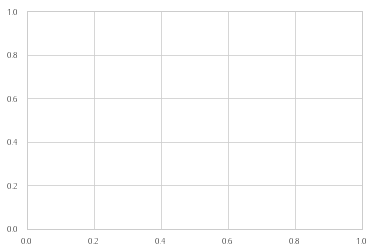

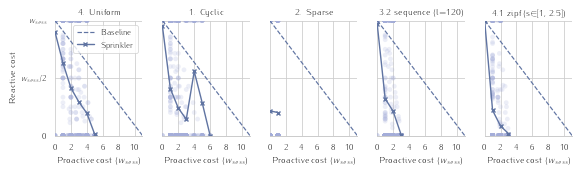

In [21]:
def average_pointcloud(data, operation=np.mean):
    intervals=[0, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.001]
    x_points=range(12)
    x=[]
    y=[]
    
    for x_point, start, stop in zip(x_points, intervals[:-1], intervals[1:]):
        points=data[(data['x'] >= start) & (data['x'] < stop)]
        if len(points) == 0:
            continue
            
        y_point=operation(points['y'])
        
        x.append(x_point)
        y.append(y_point)
        
        #print("x: {} ([{}, {}]) -> y: {}".format(x_point, start, stop, y_point))
                         
    return x, y

# model_ids=['1.', '2.', '3.1', '3.2', '4.1', '4.2', '5.1', '5.2']
# new_names=['1. uniform',
#  '2. cyclic',
#  "3.1 sequence (l=24)",
#  "3.2 sequence (l=120)",
#  "4.1 zipf (s$\in$[1, 2.5])",
#  "4.2 zipf (s$\in$[2.5, 5])",
#  "5.1 sparse (s=1)",
#  "5.2 sparse (s=4)"]

# new_names=['4. Uniform',
#  '1. Cyclic',
#  "2. Sparse/Uniform",
#  "3.2 sequence (l=120)",
#  "4.1 zipf (s$\in$[1, 2.5])",
#  "4.2 zipf (s$\in$[2.5, 5])",
#  "3. Dense/Uneven",
#  "5.2 sparse (s=4)"]

#studied_models=[5, 7, 2, 4]
#studied_models=[5, 7, 2]
#studied_models=[0,2,3,6]
# studied_models=[1, 2, 6, 0]

cmap=sns.cubehelix_palette(light=1, dark=0, start=2.7, rot=0.1, as_cmap=True)
c=cmap.colors[140]

# FIGSIZE_X=6.2
# FIGSIZE_Y=2.2

# matplotlib.rcParams['text.usetex'] = True
# matplotlib.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}'] #for \text command

plt.cla()
f, axarr=plt.subplots(nrows=1, ncols=len(studied_models), figsize=(FIGSIZE_X, FIGSIZE_Y), sharex=True, sharey=True)

for axid, experiment_id in enumerate(studied_models):    
    
    data_uniform=cost_df[cost_df['ExperimentId'] == experiment_id][['C_N_uniform', 'C_W_uniform']]
    data_uniform.columns=['x', 'y']
    data=cost_df[cost_df['ExperimentId'] == experiment_id][['C_N', 'C_W']]
    data.columns=['x', 'y']
    
    #x_u,y_u=average_pointcloud(data_uniform, np.median)
    x,y=average_pointcloud(data, np.mean)
    
    axarr[axid].plot([0, 11], [1, 0], linestyle='--', marker='', c=c, linewidth=1.2, label='Baseline')
    axarr[axid].scatter(data['x'], data['y'], c=cmap.colors[80], alpha=0.2, edgecolor='none', marker='o', label='_nolegend_')
    axarr[axid].plot(x, y, marker="x", c=c, linewidth=1.4, markeredgewidth=1.4, label='Sprinkler')
    axarr[axid].set_title(new_names[experiment_id])
    if axid == 0:
        axarr[axid].set_xlim([0,11]); axarr[axid].set_ylim([0,1])
        axarr[axid].set_ylabel('Reactive cost')
        axarr[axid].legend(frameon=True, loc='upper right')
    #elif axid == len(studied_models)-1:
        #axarr[axid].legend(frameon=True)
    axarr[axid].set_xlabel('Proactive cost ($w_{sess}$)')
    axarr[axid].set_xticks(range(0, 11, 2))
    axarr[axid].set_yticks([0, 0.5, 1])
    axarr[axid].set_yticklabels([0, "$w_{sess}/2$", "$w_{sess}$"])
    
    
    #plt.scatter(data['C_N_uniform'], data['C_W_uniform'])
    
#     data=cost_df[cost_df['ExperimentId'] == experiment_id][['C_N', 'C_W', 'C_N_uniform', 'C_W_uniform']]
#     axarr[axid].set_title(new_names[experiment_id])
#     if axid == 0:
#         axarr[axid].set_xlim([0,11]); axarr[axid].set_ylim([0,1])
#         axarr[axid].set_ylabel(r'$C_W \;(w_\text{sess})$')
#     axarr[axid].set_xlabel(r'$C_N \;(w_\text{sess})$')
    
#     sns.regplot(x=data["C_N_uniform"].values, y=data["C_W_uniform"].values, n_boot=10000,
#                 line_kws={'linestyle': '--'}, scatter=False, label='uniform', ax=axarr[axid], color=c)
#     sns.regplot(x=data["C_N"].values, y=data["C_W"].values, n_boot=10000,
#                 scatter_kws={'alpha': 0.2, 'edgecolor':"none"},
#                 fit_reg=True, label='proportional', ax=axarr[axid], color=c)

sns.despine(left=True)
plt.tight_layout()
#plt.subplots_adjust(left=0, right=1, wspace=0.1)
filename="cn_vs_cw.pdf"
#plt.savefig(PLOTS_DIR+filename)
plt.show()

## $d_\text{curr}$ knowing $d_\text{prev}$

In [110]:
cost_df[(cost_df['gamma'] == 1) & (cost_df['ExperimentId'] == 0)].shape

(69, 14)

In [111]:
69*8

552

In [106]:
results = cost_df[cost_df['gamma'] == 1]
total_count=results.shape[0]
results=results['Reactive'].apply(evaluation.splitList)
results=[item for sublist in results.values for item in sublist]
uniq=np.unique(results)
count_df=pd.Series({q: results.count(q) for q in np.unique(results)})
count_df.sort_values(inplace=True)
print(count_df)
print(count_df/total_count)
print(total_count)

failed               2
same device         15
redirected          16
received chunks    407
in sequence        523
dtype: int64
failed             0.003623
same device        0.027174
redirected         0.028986
received chunks    0.737319
in sequence        0.947464
dtype: float64
552


## Statistics of the cost per user model

### Using Seaborn

In [12]:
cmap=sns.cubehelix_palette(light=1, dark=0, start=2.7, rot=0.1, as_cmap=True)

In [13]:
# new_names=['1. uniform',
#  '2. cyclic',
#  "3.1 sequence (l=24)",
#  "3.2 sequence (l=120)",
#  "4.1 zipf (s$\in$[1, 2.5])",
#  "4.2 zipf (s$\in$[2.5, 5])",
#  "5.1 sparse (s=1)",
#  "5.2 sparse (s=4)"]
# new_names=['4. Uniform',
#  '1. Cyclic',
#  "2. Sparse/Uniform",
#  "3.2 sequence (l=120)",
#  "4.1 zipf (s$\in$[1, 2.5])",
#  "4.2 zipf (s$\in$[2.5, 5])",
#  "3. Dense/Uneven",
#  "5.2 sparse (s=4)"]
STUDIED_GAMMA=1

# studied_models=[1, 2, 6, 0]

cost_stats_df=pd.DataFrame()

#for experiment_id in range(n_experiments):
for experiment_id in studied_models:
    data=cost_df[(cost_df['ExperimentId'] == experiment_id) &
                 (cost_df['gamma'] == STUDIED_GAMMA)]['C_W']
    
    cost_stats_df=cost_stats_df.append(pd.Series({
        'ExperimentId': experiment_id,
        'ExperimentName': new_names[experiment_id],
        'Q1': np.percentile(data, 25),
        'Median': np.median(data),
        'Q3': np.percentile(data, 75),
    }), ignore_index=True)
    
cost_stats_df=cost_stats_df.sort_values(['Q1', 'Median', 'Q3'])
sorted_experiment_names=cost_stats_df['ExperimentName'].values
cost_stats_df

NameError: name 'new_names' is not defined

In [40]:
cost_df['ExperimentName']=[new_names[int(i)] for i in cost_df['ExperimentId']]

In [11]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

# PLOTS_DIR=experiment_parameters['dirs']['root']+"plots/presentation/"
filename="cost_boxes.svg"

uniform_cost=cost_df[cost_df['gamma'] == 1]['C_W_uniform'].median()


# matplotlib.rcParams['text.usetex'] = True
# matplotlib.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}'] #for \text command

# # This sets reasonable defaults for font size for
# # a figure that will go in a paper
# sns.set_context("paper")

# # Set the font to be serif, rather than sans
# sns.set(font='serif')
# sns.set(font_scale = 1)

# # Make the background white, and specify the
# # specific font family
# sns.set_style("whitegrid", {
#     "font.family": "serif",
#     "font.serif": ["Palatino", "Times", "serif"]
# })
# # matplotlib.rcParams['xtick.labelsize'] = 12
# # matplotlib.rcParams['axes.labelsize'] = 12

# FIGSIZE_X=6.2
# FIGSIZE_Y=2.2
# # Set up the matplotlib figure
f, ax = plt.subplots(figsize=(FIGSIZE_X, FIGSIZE_Y))

data=cost_df[cost_df['gamma'] == STUDIED_GAMMA]
# Split
# sns.violinplot(x='ExperimentName', y='Cost', hue='Pruned',  order=sorted_experiment_names, split=True,
#                data=sdf, scale='count', cut=0, inner='quartiles', palette='Blues')
sns.boxplot(x='ExperimentName', y='C_W', order=sorted_experiment_names,
               data=data, width=0.3, color=cmap.colors[80], linewidth=1.2, fliersize=4, saturation=1)

for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .7))

ax.set_xlabel('')
ax.set_ylabel('Reactive cost')
ax.set_yticks([0,0.5,1])
ax.set_yticklabels([0, "$w_{sess}/2$", "$w_{sess}$"])

ax.axhline(y=uniform_cost, linestyle="--", color=cmap.colors[140], linewidth=1.4,
           zorder=-1000, label="Baseline")


ax.legend(frameon=True, loc='best')
#fig.gca().set(xlabel='User model', ylabel='$\fraq{\text{Cost}}{w_{s_t}}$')

#ax.yaxis.set_major_locator(MultipleLocator(0.5))

#ax.set_title('Violin plots of the Session Handoff costs per user behavior model')

#plt.setp([a.xaxis.get_majorticklabels() for a in f.axes], rotation=-20, ha='left')
plt.setp([a.xaxis.get_majorticklabels() for a in f.axes], rotation=0, ha='center')

# Finalize the figure
plt.tight_layout()
ax.set(ylim=(0, 1))
sns.despine()
plt.tight_layout()
filename="cost_boxes.pdf"
plt.savefig(PLOTS_DIR+filename)
plt.show()

# Pull out a specific subset of networks
# used_networks = [1, 3, 4, 5, 6, 7, 8, 11, 12, 13, 16, 17]
# used_columns = (df.columns.get_level_values("network")
#                           .astype(int)
#                           .isin(used_networks))
# df = df.loc[:, used_columns]

# # Compute the correlation matrix and average over networks
# corr_df = df.corr().groupby(level="network").mean()
# corr_df.index = corr_df.index.astype(int)
# corr_df = corr_df.sort_index().T

# # Draw a violinplot with a narrower bandwidth than the default
# sns.violinplot(data=corr_df, palette="Set3", bw=.2, cut=1, linewidth=1)

NameError: name 'FIGSIZE_X' is not defined

In [78]:
np.percentile(data[data['ExperimentId'] == 2]['C_W'], 50)

0.46153846153846156

## Heatmap of the models

In [19]:
# This sets reasonable defaults for font size for
# a figure that will go in a paper
sns.set_context("paper")

# Set the font to be serif, rather than sans
sns.set(font='serif')

# Make the background white, and specify the
# specific font family
sns.set_style("white", {
    "font.family": "serif",
    "font.serif": ["Palatino", "Times", "serif"]
})

In [20]:
new_names=['1. uniform',
 '2. cyclic',
 "3.1 sequence (l=24)",
 "3.2 sequence (l=120)",
 "4.1 zipf (s $\in$ [1, 2.5])",
 "4.2 zipf (s $\in$ [2.5, 5])",
 "5.1 sparse (s=1)",
 "5.2 sparse (s=4)"]

studied_models=[1, 2, 6, 0]
PLOTS_DIR=experiment_parameters['dirs']['root']+"plots/presentation/"

In [64]:
from mpl_toolkits.axes_grid1 import ImageGrid
import matplotlib

#model_ids=['1.', '2.', '3.1', '3.2', '4.1', '4.2', '5.1', '5.2']
# cmap=sns.cubehelix_palette(light=1, dark=0, start=2.7, rot=0.1, as_cmap=True)

# matplotlib.rcParams['text.usetex'] = True
# matplotlib.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}'] #for \text command
#matplotlib.rcParams['text.usetex'] = False

n_devices=12
SIZE=2
# Set up figure and image grid
# FIGSIZE_X=6.2
# FIGSIZE_Y=2.2
fig = plt.figure(figsize=(FIGSIZE_X, FIGSIZE_Y))
#fig = plt.figure(figsize=(SIZE*4, len(studied_models)//4 * SIZE))

grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(len(studied_models)//4, 4),
                 axes_pad=0.3,
                 share_all=False,
                 label_mode="L",
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="4%",
                 cbar_pad="4%",
                 )

# Add data to image grid
#for experiment_id in range(n_experiments):
for grid_id, experiment_id in enumerate(studied_models):
    
    #print("Model {}:\n{}\n".format(model_id, W[experiment_id]))
    im = grid[grid_id].imshow(W[experiment_id], origin='lower', 
                              cmap=cmap, interpolation='nearest',
                             vmin=0, vmax=1)
    grid[grid_id].set_title(new_names[experiment_id], loc='center', y=1)
    grid[grid_id].set_xlabel('To device')
    grid[grid_id].set_ylabel('From device')
    
    grid[grid_id].grid(False)
    grid[grid_id].set_xticks(np.arange(0, n_devices, np.floor((n_devices-1)/2)))
    grid[grid_id].set_yticks(np.arange(0, n_devices, np.floor((n_devices-1)/2)))
    
    grid[grid_id].spines['right'].set_visible(False)
    grid[grid_id].spines['top'].set_visible(False)
    
#     if experiment_id != 0 and experiment_id != 4:
#         grid[experiment_id].get_yaxis().set_visible(False)
#     if experiment_id < 4:
#         grid[experiment_id].get_xaxis().set_visible(False)

#         grid[experiment_id].yaxis.set_ticklabels(np.arange(0, n_devices, np.floor((n_devices-1)/2)))
        #set_yticks(np.arange(0, n_devices, np.floor((n_devices-1)/2)))
#     else:
#         grid[experiment_id].yaxis.set_ticklabels([])
        #grid[experiment_id].set_yticks([])
        
#     grid[experiment_id].set_xticks(np.arange(0, n_devices, np.floor((n_devices-1)/2)))
#     grid[experiment_id].set_yticks(np.arange(0, n_devices, np.floor((n_devices-1)/2)))
#     grid[experiment_id].set_xticks(np.arange(0, n_devices), minor=True)
#     grid[experiment_id].set_yticks(np.arange(0, n_devices), minor=True)

# grid.axes_llc.set_xticks([0, 5, 10])
# grid.axes_llc.set_yticks([0, 5, 10])
grid.cbar_axes[0].colorbar(im, drawedges=False,
                                ticks=[0, 1])
                                     #ticks=[W[experiment_id].min(),W[experiment_id].max()], format="%.2f")
grid.axes_llc.set_xticks([0, 5, 10])
grid.axes_llc.set_yticks([0, 5, 10])
# grid.axes_llc.set_xticks(np.arange(0, n_devices), minor=True)
# grid.axes_llc.set_yticks(np.arange(0, n_devices), minor=True)

# Colorbar
#ax.cax.colorbar(im)
#ax.cax.toggle_label(True)

#fig.suptitle('Heatmap of the different $\mathcal{P}_M$')

plt.tight_layout()    # Works, but may still require rect paramater to keep colorbar labels visible
#plt.tight_layout()
plt.savefig(PLOTS_DIR+"model_heatmaps.pdf")
plt.show()

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:1743: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.



## Network traffic

In [112]:
network_df[network_df['ExperimentId'] == 0]

Address             Timestamp  bytesRec  nRec  bytesSent  nSent  \
4    13.0.0.2:10337  2017-12-21T09:12:01Z       368     1       1472      4   
1    13.0.0.9:10337  2017-12-21T09:12:01Z       369     1       1472      4   
3    13.0.0.4:10337  2017-12-21T09:12:01Z       737     2       1472      4   
0   13.0.0.11:10337  2017-12-21T09:12:01Z       368     1       1476      4   
3    13.0.0.5:10337  2017-12-21T09:12:01Z      2578     7       1104      3   
0   13.0.0.12:10337  2017-12-21T09:12:01Z      1104     3       1476      4   
2    13.0.0.6:10337  2017-12-21T09:12:01Z       737     2       1472      4   
2    13.0.0.7:10337  2017-12-21T09:12:01Z       736     2       1472      4   
0   13.0.0.13:10337  2017-12-21T09:12:02Z      4050    11       1476      4   
2    13.0.0.8:10337  2017-12-21T09:12:02Z      1475     4       1472      4   
1   13.0.0.10:10337  2017-12-21T09:12:02Z      1473     4        738      2   
1   13.0.0.12:10337  2017-12-21T09:12:02Z      2583     6       1756      4   
4    13.0.0.4:10337  2017-12-21T09:12:02Z       922     2       1844      4   
1   13.0.0.11:10337  2017-12-21T09:12:02Z      1291     3       1848      4   
4    13.0.0.5:10337  2017-12-21T09:12:02Z      3417     8       1291      3   
5    13.0.0.2:10337  2017-12-21T09:12:02Z       461     1       1660      4   
3    13.0.0.7:10337  2017-12-21T09:12:02Z      1291     3       1844      4   
4    13.0.0.3:10337  2017-12-21T09:12:02Z      2211     6       1104      3   
3    13.0.0.8:10337  2017-12-21T09:12:03Z       370     1       1383      3   
5    13.0.0.4:10337  2017-12-21T09:12:03Z      1016     2       2121      4   
5    13.0.0.5:10337  2017-12-21T09:12:03Z      3045     6       1475      3   
1   13.0.0.13:10337  2017-12-21T09:12:03Z      4152     9       1664      4   
2   13.0.0.10:10337  2017-12-21T09:12:03Z      1385     3       1756      4   
4    13.0.0.6:10337  2017-12-21T09:12:03Z       462     1       1660      4   
3    13.0.0.9:10337  2017-12-21T09:12:03Z       554     1       1477      3   
5    13.0.0.3:10337  2017-12-21T09:12:03Z      1755     4       1383      3   
2   13.0.0.12:10337  2017-12-21T09:12:03Z      3689     7       2216      4   
4    13.0.0.7:10337  2017-12-21T09:12:03Z       554     1       1475      3   
6    13.0.0.4:10337  2017-12-21T09:12:04Z      2026     4       1929      3   
2   13.0.0.13:10337  2017-12-21T09:12:04Z      2214     5       2032      4   
..              ...                   ...       ...   ...        ...    ...   
70  13.0.0.12:10337  2017-12-21T09:13:11Z      4683     8       2843      4   
74   13.0.0.2:10337  2017-12-21T09:13:11Z      2019     3       3569      5   
71   13.0.0.9:10337  2017-12-21T09:13:11Z      1284     2       5280      4   
73   13.0.0.5:10337  2017-12-21T09:13:11Z     10179     6       7369      5   
70  13.0.0.10:10337  2017-12-21T09:13:11Z      7307     8       1934      4   
73   13.0.0.3:10337  2017-12-21T09:13:11Z      5744     5       2562      3   
69  13.0.0.13:10337  2017-12-21T09:13:11Z      2923     3        740      2   
73   13.0.0.6:10337  2017-12-21T09:13:12Z      5211     6       5187      4   
71  13.0.0.11:10337  2017-12-21T09:13:12Z      5641     4       4829      4   
73   13.0.0.7:10337  2017-12-21T09:13:12Z      2729     2       3202      4   
71  13.0.0.10:10337  2017-12-21T09:13:12Z      2557     3       3474      4   
74   13.0.0.4:10337  2017-12-21T09:13:12Z      1646     2       5188      4   
72   13.0.0.8:10337  2017-12-21T09:13:12Z      3270     2       4828      4   
70  13.0.0.13:10337  2017-12-21T09:13:12Z      7293     7       2732      2   
74   13.0.0.3:10337  2017-12-21T09:13:12Z      7269     4       3824      3   
74   13.0.0.5:10337  2017-12-21T09:13:12Z     10449     6       1751      4   
75   13.0.0.2:10337  2017-12-21T09:13:12Z      1919     2       4914      4   
71  13.0.0.12:10337  2017-12-21T09:13:12Z      1376     2       9431      3   
71  13.0.0.13:10337  2017-12-21T09:13:13Z      3573     5     

In [81]:
network_df[network_df['ExperimentId'] == 0]['bytesRec'].sum()/1024

2905.7490234375

In [89]:
cost_df[(cost_df['ExperimentId'] == 3) & (cost_df['gamma'] == 2)]['C_N'].sum()

123.13968253968254

In [175]:
net_df=pd.DataFrame()

for experiment_id in range(n_experiments):
    bytesRec=network_df[network_df['ExperimentId'] == experiment_id]['bytesRec'].sum()
    nInitialDevices=len(sequence_df[sequence_df['ExperimentId'] == experiment_id]['Address'].iloc[:30].unique())
    
    print("{}:\n{} initial devices, received {:,} bytes.".format(
        experiment_names[experiment_id], nInitialDevices, bytesRec))
    
#     print("During experiment {}, {} messages were received, for a total of {:,} B.".format(
#         experiment_names[experiment_id],
#         network_df[network_df['ExperimentId'] == experiment_id]['nRec'].sum(), 
#         network_df[network_df['ExperimentId'] == experiment_id]['bytesRec'].sum()))
#     print("The initial sequence contained {} different devices.".format(
#         len(sequence_df[sequence_df['ExperimentId'] == experiment_id]['Address'].iloc[:30].unique())))
    
    for gamma in range(1,12):
        C_N=cost_df[(cost_df['ExperimentId'] == experiment_id) & (cost_df['gamma'] == gamma)]['C_N'].sum()
        
        net_df=net_df.append(pd.Series({
            'ExperimentId': experiment_id,
            'bytesRec': bytesRec,
            'nInitialDevices': nInitialDevices,
            'gamma': gamma,
            'C_N': C_N
        }), ignore_index=True)
#         print("\tgamma={} -> C_N={}".format(
#             gamma, 
#             cost_df[(cost_df['ExperimentId'] == experiment_id) & (cost_df['gamma'] == gamma)]['C_N'].sum()))
net_df['gamma']=net_df['gamma'].astype(int)
net_df

uniform:
12 initial devices, received 2,975,487 bytes.
cyclic:
12 initial devices, received 3,004,964 bytes.
from_sequence {'sequence_length': 24}:
12 initial devices, received 2,952,914 bytes.
from_sequence {'sequence_length': 120}:
11 initial devices, received 2,802,322 bytes.
zipf {'s_min': 1, 's_max': 2.5}:
8 initial devices, received 2,891,691 bytes.
zipf {'s_min': 2.5, 's_max': 5}:
11 initial devices, received 2,385,817 bytes.
sparse {'s': 1}:
12 initial devices, received 2,982,452 bytes.
sparse {'s': 4}:
8 initial devices, received 2,661,428 bytes.


C_N  ExperimentId   bytesRec  gamma  nInitialDevices
0    69.000000           0.0  2975487.0      1             12.0
1   132.133333           0.0  2975487.0      2             12.0
2   181.103571           0.0  2975487.0      3             12.0
3   214.804762           0.0  2975487.0      4             12.0
4   237.422619           0.0  2975487.0      5             12.0
5   253.107143           0.0  2975487.0      6             12.0
6   263.791667           0.0  2975487.0      7             12.0
7   269.333333           0.0  2975487.0      8             12.0
8   271.000000           0.0  2975487.0      9             12.0
9   271.000000           0.0  2975487.0     10             12.0
10  271.000000           0.0  2975487.0     11             12.0
11   69.000000           1.0  3004964.0      1             12.0
12   69.000000           1.0  3004964.0      2             12.0
13   69.000000           1.0  3004964.0      3             12.0
14   69.000000           1.0  3004964.0      4             12.0
15   69.000000           1.0  3004964.0      5             12.0
16   69.000000           1.0  3004964.0      6             12.0
17   69.000000           1.0  3004964.0      7             12.0
18   69.000000           1.0  3004964.0      8             12.0
19   69.000000           1.0  3004964.0      9             12.0
20   69.000000           1.0  3004964.0     10             12.0
21   69.000000           1.0  3004964.0     11             12.0
22   69.000000           2.0  2952914.0      1             12.0
23  108.327173           2.0  2952914.0      2             12.0
24  133.154118           2.0  2952914.0      3             12.0
25  148.548919           2.0  2952914.0      4             12.0
26  159.916307           2.0  2952914.0      5             12.0
27  166.550638           2.0  2952914.0      6             12.0
28  170.594436           2.0  2952914.0      7             12.0
29  172.203165           2.0  2952914.0      8             12.0
..         ...           ...        ...    ...              ...
58   72.426984           5.0  2385817.0      4             11.0
59   73.283730           5.0  2385817.0      5             11.0
60   73.940476           5.0  2385817.0      6             11.0
61   74.430556           5.0  2385817.0      7             11.0
62   74.777778           5.0  2385817.0      8             11.0
63   75.000000           5.0  2385817.0      9             11.0
64   75.000000           5.0  2385817.0     10             11.0
65   75.000000           5.0  2385817.0     11             11.0
66   69.000000           6.0  2982452.0      1             12.0
67  129.168903           6.0  2982452.0      2             12.0
68  159.138528           6.0  2982452.0      3             12.0
69  176.797691           6.0  2982452.0      4             12.0
70  186.413781           6.0  2982452.0      5             12.0
71  191.223810           6.0  2982452.0      6             12.0
72  193.761111           6.0  2982452.0      7             12.0
73  195.155556           6.0  2982452.0      8             12.0
74  195.800000           6.0  2982452.0      9             12.0
75  196.000000           6.0  2982452.0     10             12.0
76  196.000000           6.0  2982452.0     11             12.0
77   66.000000           7.0  2661428.0      1              8.0
78   89.390476           7.0  2661428.0      2              8.0
79  108.037994           7.0  2661428.0      3              8.0
80  120.533373           7.0  2661428.0      4              8.0
81  125.501005           7.0  2661428.0      5              8.0
82  126.817143           7.0  2661428.0      6              8.0
83  127.000000           7.0  2661428.0      7              8.0
84  127.000000           7.0  2661428.0      8              8.0
85  127.000000           7.0  2661428.0      9              8.0
86  127.000000           7.0  2661428.0     10              8.0
87  127.000000           7.0  2661428.0     11              8.0

[88 rows x 5 columns]

In [222]:
net_df['C_N_unit']=net_df['C_N']/69

In [178]:
matplotlib.rcParams.keys()

['_internal.classic_mode',
 'agg.path.chunksize',
 'animation.avconv_args',
 'animation.avconv_path',
 'animation.bitrate',
 'animation.codec',
 'animation.convert_args',
 'animation.convert_path',
 'animation.ffmpeg_args',
 'animation.ffmpeg_path',
 'animation.frame_format',
 'animation.html',
 'animation.mencoder_args',
 'animation.mencoder_path',
 'animation.writer',
 'axes.autolimit_mode',
 'axes.axisbelow',
 'axes.edgecolor',
 'axes.facecolor',
 'axes.formatter.limits',
 'axes.formatter.offset_threshold',
 'axes.formatter.use_locale',
 'axes.formatter.use_mathtext',
 'axes.formatter.useoffset',
 'axes.grid',
 'axes.grid.axis',
 'axes.grid.which',
 'axes.hold',
 'axes.labelcolor',
 'axes.labelpad',
 'axes.labelsize',
 'axes.labelweight',
 'axes.linewidth',
 'axes.prop_cycle',
 'axes.spines.bottom',
 'axes.spines.left',
 'axes.spines.right',
 'axes.spines.top',
 'axes.titlepad',
 'axes.titlesize',
 'axes.titleweight',
 'axes.unicode_minus',
 'axes.xmargin',
 'axes.ymargin',
 'axes3d

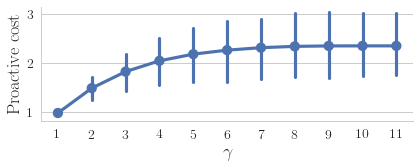

In [227]:
# This sets reasonable defaults for font size for
# a figure that will go in a paper
sns.set_context("paper")

# Set the font to be serif, rather than sans
sns.set(font='serif')

# Make the background white, and specify the
# specific font family
sns.set_style("whitegrid", {
    "font.family": "serif",
    "font.serif": ["Times", "Palatino", "serif"],
    #"font.size": 60
})
matplotlib.rcParams['axes.labelsize'] = 18
matplotlib.rcParams['xtick.labelsize'] = 14
matplotlib.rcParams['ytick.labelsize'] = 14
#sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})


fig, ax = plt.subplots(1, 1, figsize=(6, 2.5))
ax=sns.pointplot(x='gamma', y='C_N_unit', data=net_df)
#ax.set_ylim([0, 220])
ax.set_ylabel('Proactive cost')
ax.set_xlabel('$\gamma$')
sns.despine()
plt.tight_layout()
plt.savefig(PLOTS_DIR+"gamma_c_n.svg")
plt.show()

In [228]:
net_df[net_df['gamma'] == 11]['C_N'].mean()/69

2.3460144927536231

In [161]:
help(sns.set_style)

Help on function set_style in module seaborn.rcmod:

set_style(style=None, rc=None)
    Set the aesthetic style of the plots.
    
    This affects things like the color of the axes, whether a grid is
    enabled by default, and other aesthetic elements.
    
    Parameters
    ----------
    style : dict, None, or one of {darkgrid, whitegrid, dark, white, ticks}
        A dictionary of parameters or the name of a preconfigured set.
    rc : dict, optional
        Parameter mappings to override the values in the preset seaborn
        style dictionaries. This only updates parameters that are
        considered part of the style definition.
    
    Examples
    --------
    >>> set_style("whitegrid")
    
    >>> set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
    
    See Also
    --------
    axes_style : return a dict of parameters or use in a ``with`` statement
                 to temporarily set the style.
    set_context : set parameters to scale plot elements


In [137]:
net_df[net_df['ExperimentId'] == 0]['bytesRec'].median()/12/70

3542.2464285714286

## Plot cost VS expected cost per user model type

In [99]:
filename="{experiment_name}.html"

PLOTS_DIR=experiment_parameters['dirs']['root']+"plots/cost_vs_expected/"
columns=["ExpectedCost", "ExpectedCostPruned", "Cost", "CostPruned"]
colors=["#CC0000", "#FF3333", "#0000CC", "#3333FF"]
for experiment_id, experiment_name in enumerate(experiment_names):
    
    data=[]
    for i, column_name in enumerate(columns):
        data.append({
            'y': cost_df[cost_df['ExperimentId'] == experiment_id][column_name],
            'name': column_name,
            'type': 'box',
            'boxmean': 'sd',
            'marker':{'color': colors[i]}
        })
        
    layout={
        'title': "Costs and estimated costs of Session Handoff with '{}' user model and {} devices".format(
            experiment_name, experiment_parameters['n_devices']),
        'yaxis': {'range':[0, 2]},
        'showlegend':False
    }
    
    fig=go.Figure(data=data, layout=layout)
    plot(fig, filename=PLOTS_DIR+filename.format(experiment_name=experiment_name))
    
    time.sleep(1)

## Functions

In [9]:
def get_colors(n_experiments, factor=0.95):
    cmap=colormap.Colormap().cmap('Set3')
    colors=[None]*n_experiments
    for experiment_id, color in enumerate(cmap(range(n_experiments))):
        color=[min(max(x * factor, 0), 1) for x in color][:3]
        colors[experiment_id]=colormap.rgb2hex(*color, normalised=True)
    return colors

## Plot models probabilities one by one

In [16]:
PLOTS_DIR=experiment_parameters['dirs']['root']+"plots/models/"
for experiment_id, experiment_name in enumerate(experiment_names):
    model.plot_model_probabilities(W[experiment_id],
                                   show=False,
                                   model_name=experiment_name,
                                   fn=PLOTS_DIR+"model_probabilities/{}.svg".format(experiment_name))

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_base.py:3179: UserWarning:

Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0



KeyboardInterrupt: 

## Plot costs as a 3D graph of cost against user model and fanout of the session handoff

In [34]:
PLOTS_DIR=experiment_parameters['dirs']['root']+"plots/models/"

data=[]

k_values=list(range(1, experiment_parameters['n_devices']))
n_strategies=len(k_values)
#c = ['hsl('+str(int(h))+',50%'+',50%)' for h in np.linspace(0, 360, n_experiments)]
colors=get_colors(n_experiments)

In [35]:
# Computing statistics and displaying
for experiment_id, experiment_name in enumerate(experiment_names):
    experiment_df=pd.DataFrame(columns=['k', 'experiment', 'mean', 'median', 'Q1', 'Q3','rand_mean'])
    for k in k_values:
        col_name="c{}MostLikely".format(k)
        col_name_rand="c{}RandUniform".format(k)
        experiment_df=experiment_df.append(pd.Series(dict(
            k=k,
            experiment=experiment_name,
            mean=np.mean(cost_df[cost_df['ExperimentId'] == experiment_id][col_name]),
            median=np.median(cost_df[cost_df['ExperimentId'] == experiment_id][col_name]),
            Q1=np.percentile(cost_df[cost_df['ExperimentId'] == experiment_id][col_name], 25),
            Q3=np.percentile(cost_df[cost_df['ExperimentId'] == experiment_id][col_name], 75),
            rand_mean=np.mean(cost_df[cost_df['ExperimentId'] == experiment_id][col_name_rand]),
        )), ignore_index=True)
        
    #print("Experiment '{}' should have color '{}'".format(experiment_name, colors[experiment_id]))
    
    # Median 3D line
    data.append(go.Scatter3d(
        name=experiment_name,
        legendgroup=experiment_name,
        x=k_values,
        y=[experiment_name]*n_strategies,
        z=experiment_df['median'].values,
        mode="lines",
        line=dict(width=4, color=colors[experiment_id])
    ))
    # Mean 3D line
    data.append(go.Scatter3d(
        name="mean",
        legendgroup=experiment_name,
        showlegend=False,
        x=k_values,
        y=[experiment_name]*n_strategies,
        z=experiment_df['mean'].values,
        mode="lines",
        line=dict(width=4, dash='dash', color=colors[experiment_id])
    ))
    # IQR surface
    x, y, z = [], [], []
    for i, k in enumerate(k_values):
        x.append([k, k])
        y.append([experiment_name, experiment_name])
        z.append([
            experiment_df[experiment_df['k'] == k]['Q1'].values[0],
            experiment_df[experiment_df['k'] == k]['Q3'].values[0],
        ])
    data.append(go.Surface(
        name="IQR",
        legendgroup=experiment_name,
        showlegend=False,
        x=x,
        y=y,
        z=z,
        showscale=False,
        colorscale=[[0, colors[experiment_id]], [1, colors[experiment_id]]],
        opacity=0.4,
#         contours=dict(
#             x=dict(
#                 show=True,
#                 color="#999999",
#                 width=1,
#             ),
#             z=dict(
#                 show=True,
#                 color="#999999",
#                 width=1,
#             )
#         )
        #hoverinfo="none",
    ))
    
layout=dict(
#     yaxis=dict(
#         scaleratio=2,
#         #showaxeslabels=False,
#         title="lalala"
#     ),
    scene=dict(
        #aspectmode="manual",
        aspectratio=dict(x=1,y=2,z=1),
        xaxis=dict(
            title="fanout"
        ),
        yaxis=dict(
            title="",
            nticks=n_experiments
        ),
        zaxis=dict(
            title="cost"
        ),
    ),
    title="Session handoff cost per model per handoff fanout"
)

fig=go.Figure(data=data, layout=layout)
plot(fig, filename=PLOTS_DIR+"3D_plot_mix.html")

/usr/local/lib/python3.5/dist-packages/numpy/lib/function_base.py:3858: RuntimeWarning:

Invalid value encountered in median

/usr/local/lib/python3.5/dist-packages/numpy/lib/function_base.py:4116: RuntimeWarning:

Invalid value encountered in percentile



'file:///home/adrien/Thèse/ait_cyclon/plots/models/3D_plot_mix.html'

## Plot cost as a function of the fanout (one plot per user model)

In [44]:
PLOTS_DIR=experiment_parameters['dirs']['root']+"plots/models/compare_costs/"

In [51]:
def plot_cost_by_strategy_for_one_experiment(experiment_id, cost_df,
                                    strategies_columns=[],
                                    plots_dir=PLOTS_DIR,
                                    filename="{experiment_name}.html",
                                    experiment_name_suffix=""):
    experiment_name="{} {}{}".format(
        parameters_df[parameters_df['ExperimentId'] == experiment_id]['model_type'].values[0],
        parameters_df[parameters_df['ExperimentId'] == experiment_id]['model_parameters'].values[0],
        experiment_name_suffix)
    
    c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, len(strategies_columns))]
    
    data=[]
    for i, column_name in enumerate(strategies_columns):
        data.append({
            'y': cost_df[cost_df['ExperimentId'] == experiment_id][column_name],
            'name': column_name,
            'type': 'box',
            'boxmean': 'sd',
            'marker':{'color': c[i]}
        })
    
    layout={
        'title': "Cost of Session Handoff as f° of the fanout, with '{}' user model and {} devices".format(
            experiment_name, experiment_parameters['n_devices']),
        #'xaxis': {'dtick': 1},
        'showlegend':False
    }
    fig=go.Figure(data=data, layout=layout)
    plot(fig, filename=plots_dir+filename.format(experiment_name=experiment_name))

In [85]:
kept_experiments_id=[0,1,2,4,5,6,7,10]
kept_experiments_name=['1.',
 '2.',
 "3.1",
 "3.2",
 "4.1",
 "4.2",
 "5.1",
 "5.2"]
dict(zip(kept_experiments_name, 
        [experiment_names[i] for i in kept_experiments_id]))

IndexError: list index out of range

In [131]:
for experiment_id in kept_experiments_id:
    plot_cost_by_strategy_for_one_experiment(experiment_id, cost_df, [
           'cPerCaseV0F0', 'cPerCaseV0F0.5', 'cPerCaseV0F1', 'cPerCaseV0.5F0', 'cPerCaseV0.5F0.5',
           'cPerCaseV0.5F1', 'cPerCaseV1F0', 'cPerCaseV1F0.5', 'cPerCaseV1F1',
           'c1MostLikely', 'c2MostLikely', 'c9MostLikely'])
    time.sleep(1)

In [14]:
def plot_cost_as_function_of_fanout(experiment_id, cost_df,
                                    plots_dir=PLOTS_DIR, filename="{experiment_name}.html",
                                    experiment_name_suffix=""):
    experiment_name="{} {}{}".format(
        parameters_df[parameters_df['ExperimentId'] == experiment_id]['model_type'].values[0],
        parameters_df[parameters_df['ExperimentId'] == experiment_id]['model_parameters'].values[0],
        experiment_name_suffix)
    k_values=list(range(1, experiment_parameters['n_devices']))

    experiment_df=pd.DataFrame(columns=['k','mean', 'median', 'Q1', 'Q3','rand_mean'])
    for k in k_values:
        col_name="c{}MostLikely".format(k)
        col_name_rand="c{}RandUniform".format(k)
        experiment_df=experiment_df.append(pd.Series(dict(
            k=k,
            mean=np.mean(cost_df[cost_df['ExperimentId'] == experiment_id][col_name]),
            median=np.median(cost_df[cost_df['ExperimentId'] == experiment_id][col_name]),
            Q1=np.percentile(cost_df[cost_df['ExperimentId'] == experiment_id][col_name], 25),
            Q3=np.percentile(cost_df[cost_df['ExperimentId'] == experiment_id][col_name], 75),
            rand_mean=np.mean(cost_df[cost_df['ExperimentId'] == experiment_id][col_name_rand]),
        )), ignore_index=True)
    
    data=[
        go.Scatter(
            name='IQR',
            x=k_values+k_values[::-1],
            y=list(experiment_df['Q3'])+list(experiment_df['Q1'])[::-1],
            fill='tozerox',
            fillcolor='rgba(0,100,200,0.15)',
            line=go.Line(color='transparent'),
            #showlegend=False,
        ),
        go.Scatter(
            name="Median",
            x=k_values,
            y=experiment_df['median'],
            line=go.Line(color='rgb(0,100,200)'),
        ),
        #dash = 'dot'
        go.Scatter(
            name="Mean",
            x=k_values,
            y=experiment_df['mean'],
            line=go.Line(color='rgb(0,100,200)', dash = 'dash'),
        ),
        go.Scatter(
            name="Uniform rand. select. mean",
            x=k_values,
            y=experiment_df['rand_mean'],
            line=go.Line(color='rgb(100,100,100)', dash = 'dot'),
        ),
    ]
    
    layout=dict(
        title="Cost of Session Handoff as f° of the fanout, with '{}' user model and {} devices".format(
            experiment_name, experiment_parameters['n_devices']),
         xaxis=dict(
             title='# devices to share session',
        ),
        yaxis=dict(
            title='Cost (lower is better)',
            range=[0,2]
        )
    )
    fig=go.Figure(data=data, layout=layout)
    plot(fig, filename=plots_dir+filename.format(experiment_name=experiment_name))

In [23]:
plot_cost_as_function_of_fanout(5, cost_no_smoothing_df, experiment_name_suffix=" without smoothing")
plot_cost_as_function_of_fanout(5, cost_smoothing_df, experiment_name_suffix=" with smoothing")

In [9]:
PLOTS_DIR=experiment_parameters['dirs']['root']+"plots/models/by_model/"
c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, n_experiments)]

k_values=list(range(1, experiment_parameters['n_devices']))
n_strategies=len(k_values)

for experiment_id in range(n_experiments):
    plot_cost_as_function_of_fanout(experiment_id, cost_df)

## Plot cost as a whisker plots grouped by user model (one plot per fanout)

In [136]:
PLOTS_DIR=experiment_parameters['dirs']['root']+"plots/models/by_strategy/"
c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, n_experiments)]

for k in range(1, experiment_parameters['n_devices']):
    column_name="c{}MostLikely".format(k)
    
    data=[]
    for experiment_id in range(n_experiments):
        trace_name="{} {}".format(parameters_df[parameters_df['ExperimentId'] == experiment_id]['model_type'].values[0],
                                  parameters_df[parameters_df['ExperimentId'] == experiment_id]['model_parameters'].values[0])
        data.append({
            'y': cost_df[cost_df['ExperimentId'] == experiment_id][column_name],
            'name': trace_name,
            'type': 'box',
            'boxmean': 'sd',
            'marker':{'color': c[experiment_id]}
        })
    layout={
        'title': 'Cost of the session exchange for strategy "{}"'.format(column_name),
        #'xaxis': {'dtick': 1},
        'showlegend':False
    }
    
    fig=go.Figure(data=data, layout=layout)
    plot(fig, filename=PLOTS_DIR+"{}.html".format(column_name))

## Compute the Activity Gossiper efficiency

In [58]:
#get_local_sequence(sequence_df, activity_df, experiment_id, device, next_sts)

sequence_length_df=pd.DataFrame()

for experiment_id in range(n_experiments):
    print("[Activity Gossiper efficiency #{}: {} ] Let's get started...".format(
        experiment_id, evaluation.get_experiment_name(experiment_id, parameters_df)))

    # Whole sequence
    S=sequence_df[sequence_df['ExperimentId'] == experiment_id]
    
    initial_sequence_length=int(evaluation.get_parameter('initial_sequence_length', experiment_id, parameters_df))
    
    first_sts = S.iloc[initial_sequence_length]['Timestamp']

    # For each round after init (excluding the last round)
    for i in range(initial_sequence_length, len(S)):
        # current_round and next_round are pandas.core.series.Series
        # Access Address: current_round['Address']
        current_sts=S.iloc[i]['Timestamp']
        if i < len(S) - 1:
            next_sts=S.iloc[i+1]['Timestamp']
        else:
            next_sts=datetime.datetime.now()

        current_sequence_length=i+1
        
        current_activity=activity_df[
            (activity_df['ExperimentId'] == experiment_id) &
            (activity_df['Timestamp'] >= first_sts) &
            (activity_df['Timestamp'] < next_sts)
        ]
        
        current_devices=current_activity['Address'].unique()
#         used_devices=S.iloc[:i]['Address'].unique()
#         print(current_devices)
#         print(used_devices)
#         current_devices=np.intersect1d(current_devices, used_devices)
#         print(current_devices)
#         print()
        
        for d in current_devices:
            last_row=current_activity[current_activity['Address'] == d].iloc[-1]
            
#             rows_since_last_round=None
#             if i == initial_sequence_length:
#                 rows_since_last_round=current_activity[current_activity['Address'] == d]
#             else:
#                 rows_since_last_round=current_activity[
#                     (current_activity['Address'] == d) &
#                     (current_activity['Timestamp'] >= current_sts)]
            
#             nMessagesReceived=rows_since_last_round['nMessagesReceived'].sum()
            
            local_sequence_length=len(last_row['SequenceTimestamps'])
            sequence_length_df=sequence_length_df.append(pd.Series({
                "ExperimentId": experiment_id,
                "Address": last_row['Address'],
                "Timestamp": last_row['Timestamp'],
                "RoundTimestamp": current_sts,
                "SequenceLength": current_sequence_length,
                "LocalSequenceLength": local_sequence_length,
                "SequenceLengthRatio": local_sequence_length / current_sequence_length,
                "SequenceLengthDiff": current_sequence_length - local_sequence_length,
#                 "nMessagesReceived": nMessagesReceived
            }), ignore_index=True)
        
sequence_length_df

[Activity Gossiper efficiency #0: uniform ] Let's get started...
[Activity Gossiper efficiency #1: cyclic ] Let's get started...
[Activity Gossiper efficiency #2: from_sequence {'sequence_length': 24} ] Let's get started...
[Activity Gossiper efficiency #3: from_sequence {'sequence_length': 120} ] Let's get started...
[Activity Gossiper efficiency #4: zipf {'s_min': 1, 's_max': 2.5} ] Let's get started...
[Activity Gossiper efficiency #5: zipf {'s_min': 2.5, 's_max': 5} ] Let's get started...
[Activity Gossiper efficiency #6: sparse {'s': 1} ] Let's get started...
[Activity Gossiper efficiency #7: sparse {'s': 4} ] Let's get started...


Address  ExperimentId  LocalSequenceLength  \
0      13.0.0.5:10337           0.0                 31.0   
1     13.0.0.10:10337           0.0                 31.0   
2     13.0.0.11:10337           0.0                 31.0   
3     13.0.0.13:10337           0.0                 31.0   
4      13.0.0.3:10337           0.0                 31.0   
5      13.0.0.9:10337           0.0                 31.0   
6      13.0.0.4:10337           0.0                 31.0   
7      13.0.0.8:10337           0.0                 31.0   
8      13.0.0.6:10337           0.0                 31.0   
9      13.0.0.2:10337           0.0                 31.0   
10     13.0.0.7:10337           0.0                 31.0   
11    13.0.0.12:10337           0.0                 31.0   
12     13.0.0.5:10337           0.0                 32.0   
13    13.0.0.10:10337           0.0                 32.0   
14    13.0.0.11:10337           0.0                 32.0   
15    13.0.0.13:10337           0.0                 32.0   
16     13.0.0.3:10337           0.0                 32.0   
17     13.0.0.9:10337           0.0                 31.0   
18     13.0.0.4:10337           0.0                 32.0   
19     13.0.0.8:10337           0.0                 32.0   
20     13.0.0.6:10337           0.0                 32.0   
21     13.0.0.2:10337           0.0                 32.0   
22     13.0.0.7:10337           0.0                 32.0   
23    13.0.0.12:10337           0.0                 32.0   
24     13.0.0.5:10337           0.0                 33.0   
25    13.0.0.10:10337           0.0                 33.0   
26    13.0.0.11:10337           0.0                 33.0   
27    13.0.0.13:10337           0.0                 33.0   
28     13.0.0.3:10337           0.0                 33.0   
29     13.0.0.9:10337           0.0                 33.0   
...               ...           ...                  ...   
6361   13.7.0.7:10337           7.0                 98.0   
6362   13.7.0.4:10337           7.0                 98.0   
6363  13.7.0.12:10337           7.0                 98.0   
6364   13.7.0.2:10337           7.0                 98.0   
6365   13.7.0.6:10337           7.0                 98.0   
6366  13.7.0.11:10337           7.0                 98.0   
6367  13.7.0.10:10337           7.0                 98.0   
6368   13.7.0.8:10337           7.0                 97.0   
6369   13.7.0.9:10337           7.0                 99.0   
6370   13.7.0.3:10337           7.0                 99.0   
6371   13.7.0.5:10337           7.0                 99.0   
6372   13.7.0.7:10337           7.0                 99.0   
6373   13.7.0.4:10337           7.0                 99.0   
6374  13.7.0.12:10337           7.0                 99.0   
6375   13.7.0.2:10337           7.0                 99.0   
6376   13.7.0.6:10337           7.0                 99.0   
6377  13.7.0.11:10337           7.0                 98.0   
6378  13.7.0.10:10337           7.0                 98.0   
6379   13.7.0.8:10337           7.0                 99.0   
6380   13.7.0.9:10337           7.0                100.0   
6381   13.7.0.3:10337           7.0                100.0   
6382   13.7.0.5:10337           7.0                100.0   
6383   13.7.0.7:10337           7.0                100.0   
6384   13.7.0.4:10337           7.0                100.0   
6385  13.7.0.12:10337           7.0                100.0   
6386   13.7.0.2:10337           7.0                100.0   
6387   13.7.0.6:10337           7.0                100.0   
6388  13.7.0.11:10337           7.0                100.0   
6389  13.7.0.10:10337           7.0                100.0   
6390   13.7.0.8:10337           7.0                100.0   

                 RoundTimestamp  SequenceLength  SequenceLengthDiff  \
0    2017-12-21 09:12:01.337080            31.0                 0.0   
1    2017-12-21 09:12:01.337080            31.0                 0.0   
2    2017-12-21 09:12:01.337080            31.0                 0.0   
3    2017

In [10]:
experiment_ids=["1.", "2.", "3.1", "3.2", "4.1", "4.2", "5.1", "5.2"]
#sequence_length_df=sequence_length_df.drop('ExperimentName', axis=1)
for experiment_id in range(n_experiments):
    sequence_length_df.loc[sequence_length_df['ExperimentId'] == experiment_id, 'User Model'] = experiment_ids[experiment_id]

In [15]:
pd.Series({
    "Min": np.min(sequence_length_df['SequenceLengthRatio']),
    "Q1": np.percentile(sequence_length_df['SequenceLengthRatio'], 25),
    "Median": np.median(sequence_length_df['SequenceLengthRatio']),
    "Q3": np.percentile(sequence_length_df['SequenceLengthRatio'], 75),
    "Max": np.max(sequence_length_df['SequenceLengthRatio'])
})

Max       1.00000
Median    1.00000
Min       0.90411
Q1        1.00000
Q3        1.00000
dtype: float64

In [59]:
len(sequence_length_df)

6391

In [18]:
len(sequence_length_df[sequence_length_df['SequenceLengthDiff'] != 0])

577

In [22]:
sequence_length_df[sequence_length_df['SequenceLengthDiff'] != 0].median()

ExperimentId            4.000000
LocalSequenceLength    66.000000
SequenceLength         67.000000
SequenceLengthDiff      1.000000
SequenceLengthRatio     0.981818
dtype: float64

In [60]:
sequence_length_df[sequence_length_df['SequenceLengthDiff'] != 0].mean()

ExperimentId            4.091854
LocalSequenceLength    64.984402
SequenceLength         66.365685
SequenceLengthDiff      1.381282
SequenceLengthRatio     0.977612
dtype: float64

In [19]:
577/6391

0.09028321076513847

In [63]:
non_zero=sequence_length_df[sequence_length_df['SequenceLengthDiff'] != 0]

In [64]:
pd.Series({
    "Min": np.min(non_zero['SequenceLengthDiff']),
    "Q1": np.percentile(non_zero['SequenceLengthDiff'], 25),
    "Median": np.median(non_zero['SequenceLengthDiff']),
    "Q3": np.percentile(non_zero['SequenceLengthDiff'], 75),
    "Max": np.max(non_zero['SequenceLengthDiff'])
})

Max       7.0
Median    1.0
Min       1.0
Q1        1.0
Q3        2.0
dtype: float64

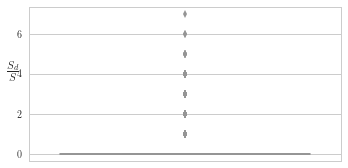

In [21]:
cmap=sns.cubehelix_palette(light=1, dark=0, start=2.7, rot=0.1, as_cmap=True)

PLOTS_DIR=experiment_parameters['dirs']['root']+"plots/"
filename="S_d-sur-S_{}.svg".format(datetime.datetime.now().isoformat('_'))

plt.close()
plt.figure(figsize=(5, 2.5))

sns.set_style("whitegrid")
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}'] #for \text command

ax = sns.boxplot(y="SequenceLengthDiff",data=sequence_length_df, orient='v',
                 color=cmap.colors[10], whis=1.5)
ax.set_ylabel(r'$\frac{S_d}{S}$', fontsize=16, rotation=0)
plt.tight_layout()
plt.savefig(PLOTS_DIR+filename)
plt.show()

## Heatmap of the user's model

### Plotly version:

In [153]:
PLOTS_DIR=experiment_parameters['dirs']['root']+"plots/models/"
experiment_id=1

data=[go.Heatmap(
    z=W[experiment_id],
    name=experiment_names[experiment_id],
    colorscale = 'Viridis',
    transpose=True
)]

layout=dict(
    title="Probability of switching from a device to another for model: {}".format(experiment_names[experiment_id]),
    xaxis=dict(
        title="From device"
    ),
    yaxis=dict(
        title="To device"
    )
)

fig=go.Figure(data=data, layout=layout)
plot(fig, filename=PLOTS_DIR+"heatmap.html")

'file:///home/adrien/Thèse/ait_cyclon/plots/models/heatmap.html'

### Matplotlib

In [121]:
kept_experiments_id=[0,1,2,4,5,6,7,10]
kept_experiments_name=['1.',
 '2.',
 "3.1",
 "3.2",
 "4.1",
 "4.2",
 "5.1",
 "5.2"]
dict(zip(kept_experiments_name, 
        [experiment_names[i] for i in kept_experiments_id]))

{'1.': 'uniform ',
 '2.': 'cyclic ',
 '3.1': "from_sequence {'sequence_length': 24}",
 '3.2': "from_sequence {'sequence_length': 120}",
 '4.1': "zipf {'s_max': 2.5, 's_min': 1}",
 '4.2': "zipf {'s_max': 5, 's_min': 2.5}",
 '5.1': "sparse {'s': 1}",
 '5.2': "sparse {'s': 4}"}

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_base.py:3179: UserWarning:

Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0833333333333, top=0.0833333333333



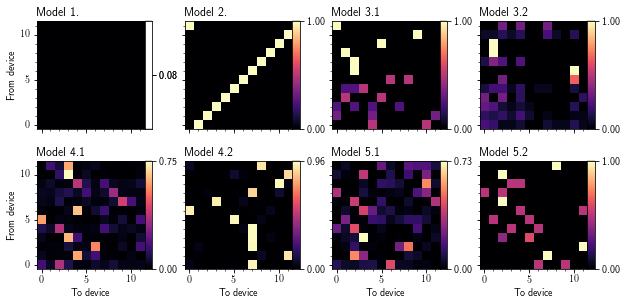

In [31]:
from mpl_toolkits.axes_grid1 import ImageGrid
from matplotlib import rc

rc('text', usetex=True)

n_devices=12
SIZE=2.5
n_kept_experiments=len(kept_experiments_id)
# Set up figure and image grid
fig = plt.figure(figsize=(SIZE*4, n_kept_experiments//4 * SIZE))

grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(n_kept_experiments//4, 4),
                 axes_pad=0.45,
                 share_all=True,
                 direction="row",
                 cbar_location="right",
                 cbar_mode="each",
                 cbar_size="7%",
                 cbar_pad="0%",
                 )

# Add data to image grid
kept_id=0
for experiment_id, ax in zip(kept_experiments_id, grid):
    im = ax.imshow(W[experiment_id], origin='lower', cmap='magma')
    ax.set_title("Model "+kept_experiments_name[kept_id], loc='left')
    ax.set_xlabel('To device')
    ax.set_ylabel('From device')
    ax.set_xticks(np.arange(0, n_devices, np.floor((n_devices-1)/2)))
    ax.set_xticks(np.arange(0, n_devices), minor=True)
    ax.set_yticks(np.arange(0, n_devices, np.floor((n_devices-1)/2)))
    ax.set_yticks(np.arange(0, n_devices), minor=True)
    
    grid.cbar_axes[kept_id].colorbar(im, drawedges=False, 
                                     ticks=[W[experiment_id].min(),W[experiment_id].max()], format="%.2f")

    kept_id+=1
# Colorbar
#ax.cax.colorbar(im)
#ax.cax.toggle_label(True)

#fig.suptitle('Heatmap of the different $\mathcal{P}_M$')

#plt.tight_layout()    # Works, but may still require rect paramater to keep colorbar labels visible
PLOTS_DIR=experiment_parameters['dirs']['root']+"plots/models/"
plt.savefig(PLOTS_DIR+"model_heatmaps_mix.svg")
plt.show()

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_base.py:3179: UserWarning:

Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0



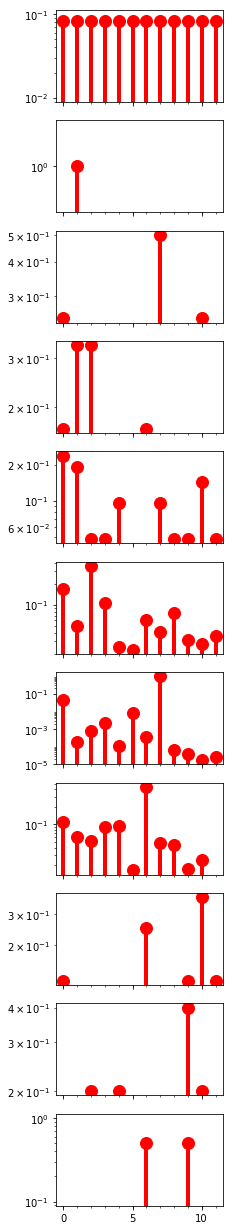

In [185]:
plt.clf()
SIZE=2
fig, axarr = plt.subplots(n_experiments, 1, sharex=True, figsize=(SIZE+1, n_experiments * SIZE))

for experiment_id in range(n_experiments):
    model.plot_single_model_probability(W[experiment_id], 0, axarr[experiment_id])

plt.savefig(PLOTS_DIR+"model_first_device.svg")
plt.show()

In [11]:
dict(enumerate(experiment_names))

{0: 'uniform ',
 1: 'cyclic ',
 2: "from_sequence  {'sequence_length': 24}",
 3: "from_sequence  {'sequence_length': 72}",
 4: "from_sequence  {'sequence_length': 120}",
 5: "zipf  {'s_max': 2.5, 's_min': 1}",
 6: "zipf  {'s_max': 5, 's_min': 2.5}",
 7: "sparse  {'s': 1}",
 8: "sparse  {'s': 2}",
 9: "sparse  {'s': 3}",
 10: "sparse  {'s': 4}"}

In [123]:
[np.count_nonzero(w) for w in W[7]]

[11, 11, 8, 10, 9, 12, 11, 11, 10, 10, 9, 11]

In [115]:
for experiment_id in range(n_experiments):
    diff=[]
    max_min_ratio=[]
    constant_proba=0
    
    for line, w in enumerate(W[experiment_id]):
        biggest=np.max(w)
        
        if biggest == 1:
            constant_proba+=1
            continue
            
        biggest_ids=(w == biggest)
        
        if np.count_nonzero(biggest_ids) > 1:
            diff.append(1)
            continue
        
        second=np.max(w[w != biggest])
        if second == 0:
            print("ca buggue avec {} à la ligne {}:\n{}".format(experiment_id, line, w))
            continue
        
        diff.append(biggest / second)
        
        smallest=np.min(w[w > 0])
        max_min_ratio.append(biggest/smallest)
            
    print(experiment_names[experiment_id])
    print("std:", np.std(W[experiment_id]))
    print("mean factor b/w biggest & second proba: {}".format(np.mean(diff)))
    print("median factor b/w biggest & second proba: {}".format(np.median(diff)))
    print("# devices that will always switch to the same device:", constant_proba)
    print("mean factor b/w biggest & smallest proba: {}".format(np.mean(diff)))
    print("median factor b/w biggest & smallest proba: {}".format(np.median(diff)))
    print()

uniform

std: 0.0
mean factor b/w biggest & second proba: 1.0
median factor b/w biggest & second proba: 1.0
# devices that will always switch to the same device: 0
mean factor b/w biggest & smallest proba: 1.0
median factor b/w biggest & smallest proba: 1.0

cyclic

std: 0.276385399196
mean factor b/w biggest & second proba: nan
median factor b/w biggest & second proba: nan
# devices that will always switch to the same device: 12
mean factor b/w biggest & smallest proba: nan
median factor b/w biggest & smallest proba: nan

from_sequence
{'sequence_length': 24}
std: 0.229692158452
mean factor b/w biggest & second proba: 1.3333333333333333
median factor b/w biggest & second proba: 1.0
# devices that will always switch to the same device: 6
mean factor b/w biggest & smallest proba: 1.3333333333333333
median factor b/w biggest & smallest proba: 1.0

from_sequence
{'sequence_length': 72}
std: 0.184533067662
mean factor b/w biggest & second proba: 1.5416666666666665
median factor b/w biggest

/usr/local/lib/python3.5/dist-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning:

Mean of empty slice.

/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:80: RuntimeWarning:

invalid value encountered in double_scalars



## Misc

### Draw a pretty Zipf function

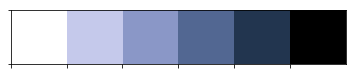

In [7]:
%matplotlib inline
cmap=sns.cubehelix_palette(light=1, dark=0, start=2.7, rot=0.1, as_cmap=True)
sns.palplot(sns.cubehelix_palette(light=1, dark=0, start=2.7, rot=0.1))

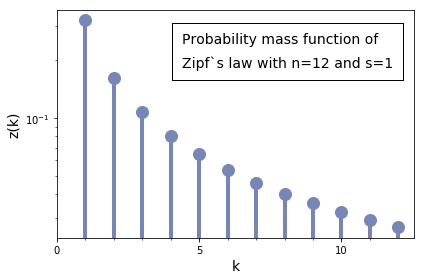

In [16]:
zipf=model.zipf_gen(N=12, s=1).pmf()
n_devices=12
xaxis=list(range(1,n_devices+1))

c=cmap.colors[120]

plt.clf()
fig, ax = plt.subplots()
ax.plot(xaxis, zipf, 'ro', ms=n_devices, color=c)
ax.vlines(xaxis, 0, zipf, colors=c, lw=4)
ax.set_yscale('log')
ax.set_xticks(np.arange(0, n_devices, np.floor((n_devices-1)/2)))
ax.set_xticks(np.arange(0, n_devices), minor=True)
ax.set_xlabel('k', fontsize=14)
ax.set_ylabel('z(k)', fontsize=14)


ax.text(0.94, 0.90, 'Probability mass function of\nZipf`s law with n=12 and s=1',
        verticalalignment='top', horizontalalignment='right', multialignment='left',
        transform=ax.transAxes, fontsize=14, linespacing=1.8,
        bbox={'facecolor':'white', 'pad':10})

plt.tight_layout()
PLOTS_DIR=experiment_parameters['dirs']['root']+"plots/"
plt.savefig(PLOTS_DIR+"zipf.svg")
plt.show()